In [1438]:
#importing necessary libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [1439]:
# Establish a connection to an SQLite database named "accident_project_data.db"

conn = sqlite3.connect("accident_project_data.db")
if conn:
    print ("connection to database successful")
else:
    print("connection to database not successful")

connection to database successful


In [1595]:
# Create a cursor object to interact with the database

cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

tbls = []
for each_tb in cursor.fetchall():
    tbls.append(each_tb[0])
print("The following tables are in the database")
for i in tbls:
    print(i)

The following tables are in the database
accident
casualty
vehicle
lsoa


In [1596]:
accident_df = pd.read_sql(f"SELECT * FROM accident", conn)
casualty_df = pd.read_sql(f"SELECT * FROM casualty", conn)
vehicle_df = pd.read_sql(f"SELECT * FROM vehicle", conn)
lsoa_df = pd.read_sql(f"SELECT * FROM lsoa", conn)

In [1442]:
# Read the 'accident' table from the database into a DataFrame for the year 2020
accident_df = pd.read_sql(f"SELECT * FROM accident where accident_year=2020;", conn)

#print the dataframe
accident_df

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,1,04/02/2020,3,09:00,10,E09000032,E09000032,6,0,6,20,0,-1,0,-1,9,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,27/04/2020,2,13:55,9,E09000022,E09000022,3,3036,6,20,9,2,6,0,0,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,01/01/2020,4,01:25,1,E09000033,E09000033,5,0,6,30,3,1,6,0,0,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,1,01/01/2020,4,01:50,17,E09000025,E09000025,3,11,6,30,0,-1,0,-1,0,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,2,01/01/2020,4,02:25,1,E09000033,E09000033,3,40,6,30,3,4,5,0,0,0,4,1,1,0,0,1,1,2,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,1,12/08/2020,4,14:30,918,S12000042,S12000042,4,959,6,30,1,4,4,959,0,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,1,13/11/2020,6,15:05,922,S12000011,S12000011,6,0,9,30,3,4,6,0,0,0,1,1,1,0,0,1,2,-1,-1
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,1,15/04/2020,4,12:42,910,S12000033,S12000033,4,979,6,60,8,-1,6,0,0,0,1,1,1,0,0,2,1,-1,-1
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,1,15/12/2020,3,14:00,932,S12000044,S12000044,6,0,6,30,3,4,6,0,0,0,1,1,1,0,0,1,2,-1,-1


In [1443]:
# Set the display option to show all columns
pd.set_option('display.max_columns', None)

# Now when you print the DataFrame, it will display all columns
(accident_df)

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,1,04/02/2020,3,09:00,10,E09000032,E09000032,6,0,6,20,0,-1,0,-1,9,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,27/04/2020,2,13:55,9,E09000022,E09000022,3,3036,6,20,9,2,6,0,0,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,01/01/2020,4,01:25,1,E09000033,E09000033,5,0,6,30,3,1,6,0,0,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,1,01/01/2020,4,01:50,17,E09000025,E09000025,3,11,6,30,0,-1,0,-1,0,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,2,01/01/2020,4,02:25,1,E09000033,E09000033,3,40,6,30,3,4,5,0,0,0,4,1,1,0,0,1,1,2,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,1,12/08/2020,4,14:30,918,S12000042,S12000042,4,959,6,30,1,4,4,959,0,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,1,13/11/2020,6,15:05,922,S12000011,S12000011,6,0,9,30,3,4,6,0,0,0,1,1,1,0,0,1,2,-1,-1
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,1,15/04/2020,4,12:42,910,S12000033,S12000033,4,979,6,60,8,-1,6,0,0,0,1,1,1,0,0,2,1,-1,-1
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,1,15/12/2020,3,14:00,932,S12000044,S12000044,6,0,6,30,3,4,6,0,0,0,1,1,1,0,0,1,2,-1,-1


In [1444]:
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91185 non-null  float64
 4   location_northing_osgr                       91185 non-null  float64
 5   longitude                                    91185 non-null  float64
 6   latitude                                     91185 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  
 10

In [1445]:
accident_df.isnull().sum()

accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                          14
location_northing_osgr                         14
longitude                                      14
latitude                                       14
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0


In [1446]:
# Calculate the mean longitude for each local authority district

longitude = accident_df.groupby('local_authority_ons_district')['longitude'].transform('mean')

In [1447]:
# Calculate the mean latitude for each local authority district

latitude = accident_df.groupby('local_authority_ons_district')['latitude'].transform('mean')

In [1448]:
# Fill missing longitude values with the mean longitude for the respective local authority district

accident_df['longitude'] = accident_df['longitude'].fillna(longitude)

In [1449]:
# Fill missing latitude values with the mean latitude for the respective local authority district

accident_df['latitude'] = accident_df['latitude'].fillna(latitude)

In [1450]:
# Identify columns with missing values and print the count of missing values for each

accident_df.isnull().sum()[accident_df.isnull().sum()!= 0]

location_easting_osgr     14
location_northing_osgr    14
dtype: int64

In [1451]:
 # Calculate the mean of 'location_easting_osgr and location_northing_osgr
mean_easting =accident_df['location_easting_osgr'].mean()
mean_northing = accident_df['location_northing_osgr'].mean()

In [1452]:
#Fill missing values in 'location_easting_osgr' with the mean value.
accident_df['location_easting_osgr'].fillna(mean_easting, inplace=True)

#Fill missing values in 'location_northing_osgr' with the mean value.
accident_df['location_northing_osgr'].fillna(mean_northing, inplace=True)

C:\Users\boluw\AppData\Local\Temp\ipykernel_7116\2998883666.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  accident_df['location_easting_osgr'].fillna(mean_easting, inplace=True)
C:\Users\boluw\AppData\Local\Temp\ipykernel_7116\2998883666.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [1453]:
accident_df.isnull().sum()

accident_index                                 0
accident_year                                  0
accident_reference                             0
location_easting_osgr                          0
location_northing_osgr                         0
longitude                                      0
latitude                                       0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
local_authority_ons_district                   0
local_authority_highway                        0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit         

In [1454]:
# Convert the 'date' column to datetime format,'day/month/year'
accident_df['date'] = pd.to_datetime(accident_df['date'], format='%d/%m/%Y')

In [1455]:
# Extract day, month, year, and day of the week from the 'date' column
accident_df["day"] = accident_df["date"].dt.day
accident_df["month"] = accident_df["date"].dt.month
accident_df["year"] = accident_df["date"].dt.year
accident_df["day_of_week"] = accident_df["date"].dt.dayofweek

In [1456]:
# Convert the 'time' column to datetime format and extract time
accident_df['time'] = pd.to_datetime(accident_df['time'], format='%H:%M').dt.time

In [1457]:
# Extract hour from time and create a new column 'hour'
accident_df['hour'] = accident_df['time'].apply(lambda x: x.hour)
(accident_df.head())

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,day,month,year,hour
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,1,2020-02-04,1,09:00:00,10,E09000032,E09000032,6,0,6,20,0,-1,0,-1,9,9,1,9,9,0,0,1,3,2,E01004576,4,2,2020,9
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,2020-04-27,0,13:55:00,9,E09000022,E09000022,3,3036,6,20,9,2,6,0,0,4,1,1,1,0,0,1,1,2,E01003034,27,4,2020,13
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,2020-01-01,2,01:25:00,1,E09000033,E09000033,5,0,6,30,3,1,6,0,0,0,4,1,2,0,0,1,1,2,E01004726,1,1,2020,1
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,1,2020-01-01,2,01:50:00,17,E09000025,E09000025,3,11,6,30,0,-1,0,-1,0,4,4,1,1,0,0,1,1,2,E01003617,1,1,2020,1
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,2,2020-01-01,2,02:25:00,1,E09000033,E09000033,3,40,6,30,3,4,5,0,0,0,4,1,1,0,0,1,1,2,E01004763,1,1,2020,2


In [1458]:
# Group by hour
hourly_accidents = accident_df.groupby('hour').size()

# Group by day of the week
daily_accidents = accident_df.groupby('day_of_week').size()

#### Creating visualizations to understand the frequency of accidents across different hours and days.

C:\Users\boluw\AppData\Local\Temp\ipykernel_7116\1306356561.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=accident_df, x="hour", palette="viridis")


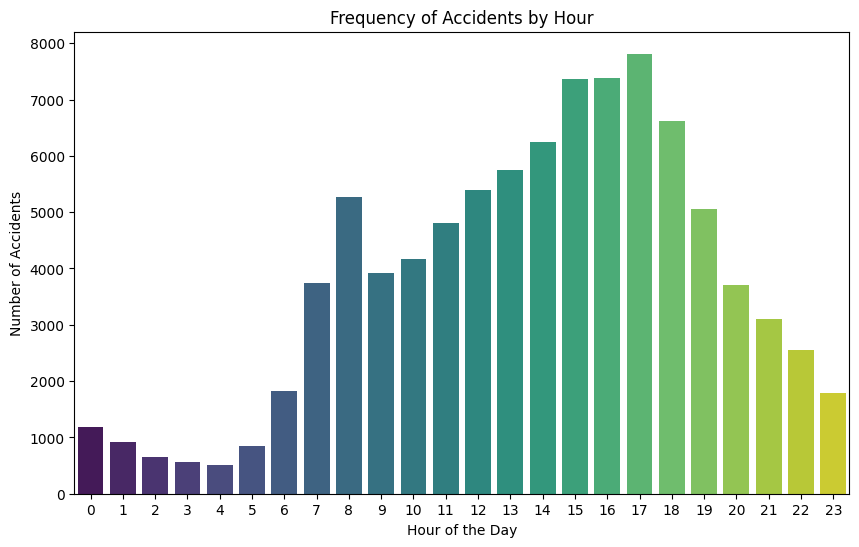

In [1459]:
plt.figure(figsize=(10, 6))
sns.countplot(data=accident_df, x="hour", palette="viridis")
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.title('Frequency of Accidents by Hour')
plt.xticks(rotation=0)
plt.show()

C:\Users\boluw\AppData\Local\Temp\ipykernel_7116\658591746.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=accident_df, x="day_of_week", palette="viridis")


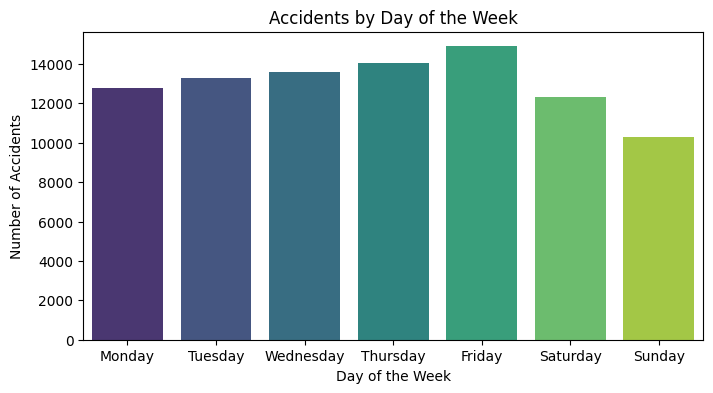

In [1460]:
# Count of accidents by day of the week
plt.figure(figsize=(8, 4))
sns.countplot(data=accident_df, x="day_of_week", palette="viridis")
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

In [1461]:
vehicle_df = pd.read_sql(f"SELECT * FROM vehicle where accident_year=2020;", conn)

#print the dataframe
vehicle_df

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,681716,2020010219808,2020,010219808,1,9,9,5,1,5,0,0,0,0,0,0,4,9,6,2,32,6,1968,2,6,AUDI Q5,4,1
1,681717,2020010220496,2020,010220496,1,9,0,4,2,6,0,2,0,0,0,0,1,1,2,1,45,7,1395,1,2,AUDI A1,7,1
2,681718,2020010228005,2020,010228005,1,9,0,18,-1,-1,0,0,0,0,0,0,1,1,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,681719,2020010228006,2020,010228006,1,8,0,18,1,5,0,0,0,0,0,0,1,1,1,1,44,7,1798,8,8,TOYOTA PRIUS,2,1
4,681720,2020010228011,2020,010228011,1,9,0,18,3,7,9,1,0,0,0,0,1,1,6,1,20,4,2993,2,4,BMW 4 SERIES,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167370,849086,2020991030297,2020,991030297,1,9,0,7,8,2,0,6,0,0,0,0,3,1,1,1,57,9,1968,2,2,AUDI A5,7,1
167371,849087,2020991030297,2020,991030297,2,5,0,16,6,2,0,1,0,0,0,0,1,1,5,1,38,7,1301,1,2,KTM 1290 SUPERDUKE,9,2
167372,849088,2020991030900,2020,991030900,1,9,0,7,8,2,0,6,0,0,0,0,3,1,6,2,68,10,1995,2,1,BMW X3,5,1
167373,849089,2020991030900,2020,991030900,2,1,0,18,6,2,4,8,0,0,0,0,1,1,6,1,76,11,-1,-1,-1,-1,9,1


In [1462]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167375 entries, 0 to 167374
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   vehicle_index                     167375 non-null  int64 
 1   accident_index                    167375 non-null  object
 2   accident_year                     167375 non-null  int64 
 3   accident_reference                167375 non-null  object
 4   vehicle_reference                 167375 non-null  int64 
 5   vehicle_type                      167375 non-null  int64 
 6   towing_and_articulation           167375 non-null  int64 
 7   vehicle_manoeuvre                 167375 non-null  int64 
 8   vehicle_direction_from            167375 non-null  int64 
 9   vehicle_direction_to              167375 non-null  int64 
 10  vehicle_location_restricted_lane  167375 non-null  int64 
 11  junction_location                 167375 non-null  int64 
 12  sk

In [1463]:
vehicle_df.isnull().sum()

vehicle_index                       0
accident_index                      0
accident_year                       0
accident_reference                  0
vehicle_reference                   0
vehicle_type                        0
towing_and_articulation             0
vehicle_manoeuvre                   0
vehicle_direction_from              0
vehicle_direction_to                0
vehicle_location_restricted_lane    0
junction_location                   0
skidding_and_overturning            0
hit_object_in_carriageway           0
vehicle_leaving_carriageway         0
hit_object_off_carriageway          0
first_point_of_impact               0
vehicle_left_hand_drive             0
journey_purpose_of_driver           0
sex_of_driver                       0
age_of_driver                       0
age_band_of_driver                  0
engine_capacity_cc                  0
propulsion_code                     0
age_of_vehicle                      0
generic_make_model                  0
driver_imd_d

In [1464]:
vehicle_df['vehicle_type'].unique()

array([ 9,  8,  3,  2, 11,  1, 90, 19,  4,  5, 21, 97, 20, 98, 10, 17, 23,
       22, 18, 16])

In [1465]:
# Define motorbike categories based on identified codes
motorbike_125cc_under = vehicle_df[(vehicle_df['vehicle_type'] == 3) & (vehicle_df['engine_capacity_cc'] <= 125)]
motorbike_125cc_500cc = vehicle_df[(vehicle_df['vehicle_type'] == 4) & (vehicle_df['engine_capacity_cc'] > 125) & (vehicle_df['engine_capacity_cc'] <= 500)]
motorbike_over_500cc = vehicle_df[(vehicle_df['vehicle_type'] == 5) & (vehicle_df['engine_capacity_cc'] > 500)]

In [1466]:
# Merge dataframes to include date and time information
motorbike_125cc_under_merged = pd.merge(motorbike_125cc_under, accident_df, on='accident_index')
motorbike_125cc_500cc_merged = pd.merge(motorbike_125cc_500cc, accident_df, on='accident_index')
motorbike_over_500cc_merged = pd.merge(motorbike_over_500cc, accident_df, on='accident_index')

# Check merged data
(motorbike_125cc_under_merged.head())
(motorbike_125cc_500cc_merged.head())
(motorbike_over_500cc_merged.head())

,vehicle_index,accident_index,accident_year_x,accident_reference_x,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,accident_year_y,accident_reference_y,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,day,month,year,hour
0,681835,2020010228283,2020,010228283,2,5,0,18,1,5,0,8,0,0,0,0,1,1,6,1,35,6,600,1,8,YAMAHA XJ6,2,1,2020,010228283,524504.0,178619.0,-0.207961,51.492817,1,2,2,1,2020-01-02,3,15:24:00,11,E09000013,E09000013,4,317,6,20,8,4,6,0,0,8,1,1,1,0,0,1,1,2,E01001868,2,1,2020,15
1,682050,2020010228659,2020,010228659,2,5,0,18,5,1,0,8,0,0,0,0,1,1,6,1,48,8,1200,1,17,HARLEY-DAVIDSON MODEL MISSING,2,1,2020,010228659,530728.0,187433.0,-0.115087,51.570623,1,3,2,1,2020-01-05,6,16:35:00,3,E09000019,E09000019,3,1201,6,20,7,2,5,0,0,5,1,1,1,0,0,1,1,2,E01002805,5,1,2020,16
2,682097,2020010228738,2020,010228738,3,5,0,18,7,3,0,0,0,0,0,0,1,1,2,1,40,7,647,1,2,-1,6,1,2020,010228738,515249.0,183075.0,-0.339757,51.534826,1,3,4,1,2020-01-06,0,08:34:00,27,E09000009,E09000009,3,40,3,40,0,-1,0,-1,0,0,1,1,1,0,0,1,1,2,E01001266,6,1,2020,8
3,682118,2020010228796,2020,010228796,2,5,5,15,1,5,0,0,5,0,0,0,1,1,6,1,31,6,865,1,15,TRIUMPH BONNEVILLE,4,1,2020,010228796,530758.0,179386.0,-0.117641,51.498300,1,3,2,1,2020-01-06,0,17:40:00,9,E09000022,E09000022,3,3036,6,20,0,-1,0,-1,0,1,4,1,2,0,0,1,1,2,E01003013,6,1,2020,17
4,682166,2020010228865,2020,010228865,2,5,0,18,1,5,0,0,0,0,0,0,1,1,6,1,18,4,847,1,3,YAMAHA MT09,1,1,2020,010228865,548578.0,178347.0,0.138462,51.484565,1,3,2,1,2020-01-07,1,00:50:00,18,E09000004,E09000004,6,0,6,30,0,-1,0,-1,0,0,4,1,2,0,0,1,1,2,E01000334,7,1,2020,0


C:\Users\boluw\AppData\Local\Temp\ipykernel_7116\610654631.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=motorbike_125cc_under_merged, x='hour', palette='viridis')


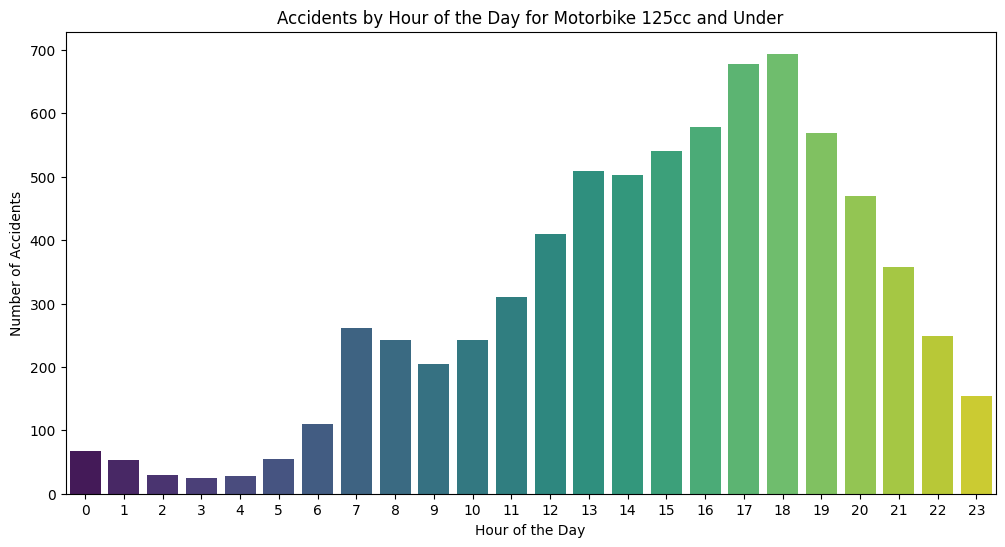

In [1467]:
# Visualization of accidents by hour of the day for motorbikes 125cc and under using countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=motorbike_125cc_under_merged, x='hour', palette='viridis')
plt.title('Accidents by Hour of the Day for Motorbike 125cc and Under')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))
plt.show()

C:\Users\boluw\AppData\Local\Temp\ipykernel_7116\1973177904.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=motorbike_125cc_under_merged, x='day_of_week', palette='viridis')


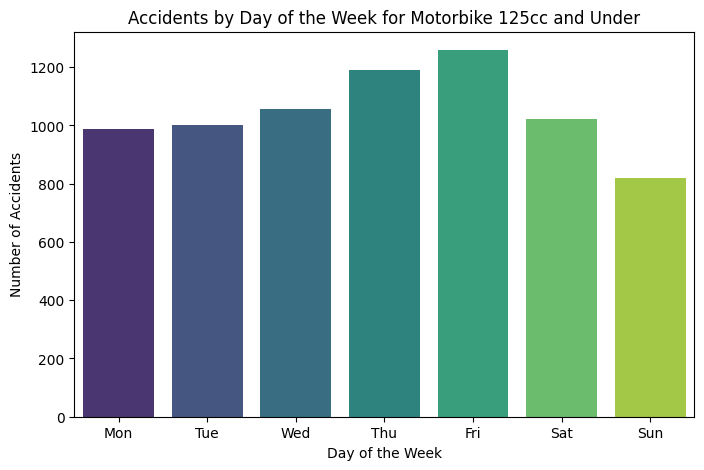

In [1468]:
plt.figure(figsize=(8, 5))
sns.countplot(data=motorbike_125cc_under_merged, x='day_of_week', palette='viridis')
plt.title('Accidents by Day of the Week for Motorbike 125cc and Under')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

C:\Users\boluw\AppData\Local\Temp\ipykernel_7116\1132036190.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=motorbike_125cc_500cc_merged, x='hour', palette='viridis')


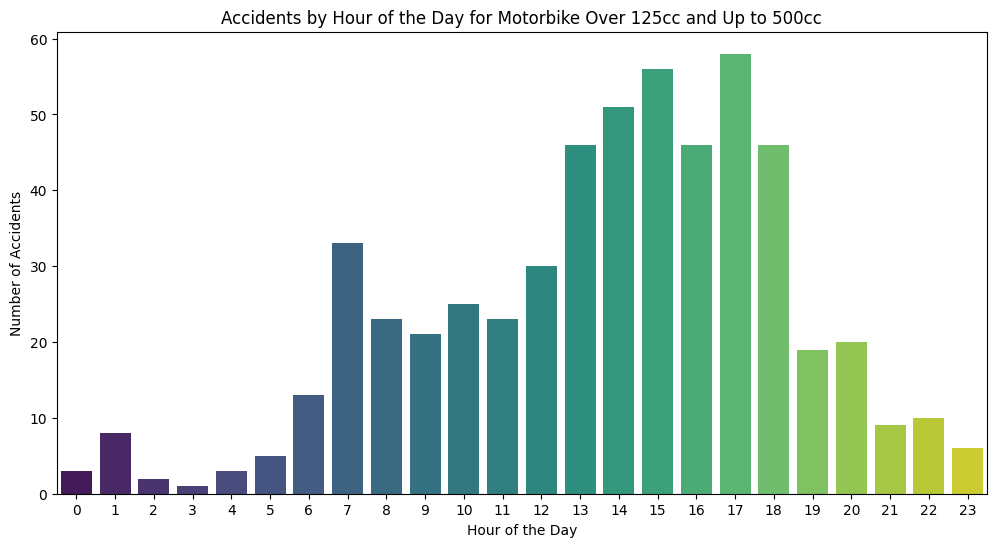

In [1469]:
plt.figure(figsize=(12, 6))
sns.countplot(data=motorbike_125cc_500cc_merged, x='hour', palette='viridis')
plt.title('Accidents by Hour of the Day for Motorbike Over 125cc and Up to 500cc')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))
plt.show()

C:\Users\boluw\AppData\Local\Temp\ipykernel_7116\908731609.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=motorbike_125cc_500cc_merged, x='day_of_week', palette='viridis')


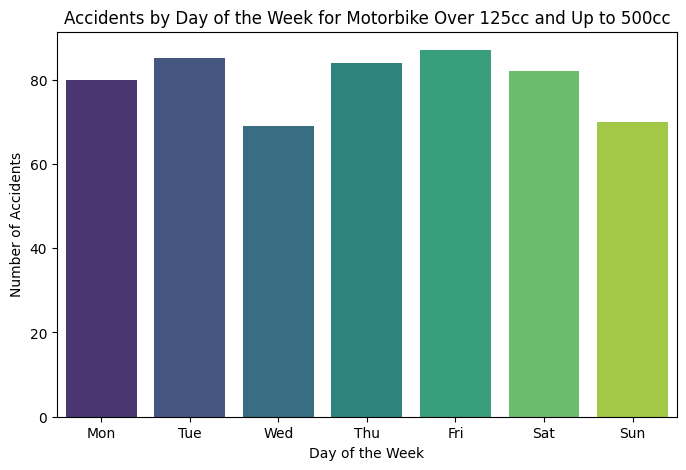

In [1470]:
# Visualization of accidents by day of the week for motorbikes between 125cc and 500cc using countplot
plt.figure(figsize=(8, 5))
sns.countplot(data=motorbike_125cc_500cc_merged, x='day_of_week', palette='viridis')
plt.title('Accidents by Day of the Week for Motorbike Over 125cc and Up to 500cc')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

C:\Users\boluw\AppData\Local\Temp\ipykernel_7116\3360093753.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=motorbike_over_500cc_merged, x='hour', palette='viridis')


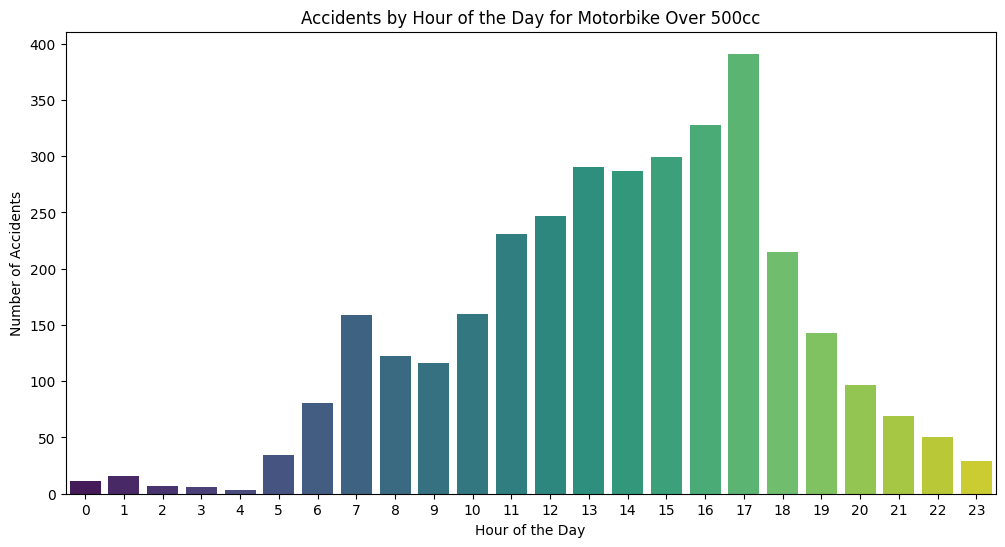

In [1471]:
# Visualization of motorbike accidents by hour of the day using countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=motorbike_over_500cc_merged, x='hour', palette='viridis')
plt.title('Accidents by Hour of the Day for Motorbike Over 500cc')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))
plt.show()

C:\Users\boluw\AppData\Local\Temp\ipykernel_7116\756440922.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=motorbike_over_500cc_merged, x='day_of_week', palette='viridis')


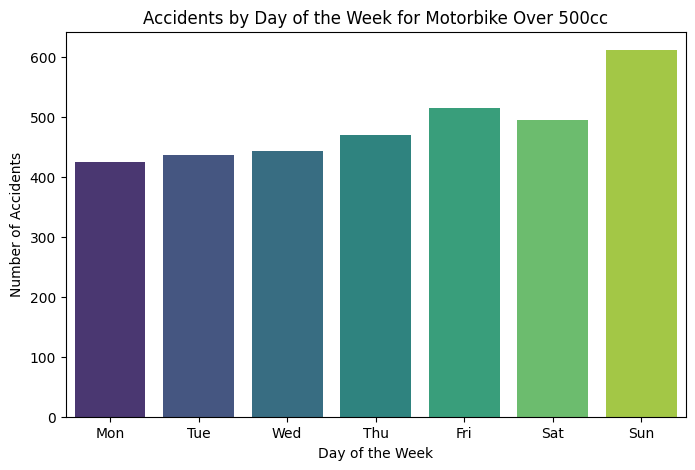

In [1472]:
# Visualization of accidents by day of the week for motorbikes over 500cc using countplot
plt.figure(figsize=(8, 5))
sns.countplot(data=motorbike_over_500cc_merged, x='day_of_week', palette='viridis')
plt.title('Accidents by Day of the Week for Motorbike Over 500cc')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

In [1473]:
casualty_df = pd.read_sql(f"SELECT * FROM casualty where accident_year=2020;", conn)

#print the dataframe
casualty_df

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,484748,2020010219808,2020,010219808,1,1,3,1,31,6,3,9,5,0,0,0,0,1,4
1,484749,2020010220496,2020,010220496,1,1,3,2,2,1,3,1,1,0,0,0,0,1,2
2,484750,2020010220496,2020,010220496,1,2,3,2,4,1,3,1,1,0,0,0,0,1,2
3,484751,2020010228005,2020,010228005,1,1,3,1,23,5,3,5,9,0,0,0,0,1,3
4,484752,2020010228006,2020,010228006,1,1,3,1,47,8,2,4,1,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115579,600327,2020991027064,2020,991027064,2,1,1,1,11,3,2,0,0,0,0,0,1,1,2
115580,600328,2020991029573,2020,991029573,1,1,3,2,63,9,3,10,1,0,0,0,0,1,10
115581,600329,2020991030297,2020,991030297,2,1,1,1,38,7,2,0,0,0,0,0,5,2,9
115582,600330,2020991030900,2020,991030900,2,1,1,1,76,11,3,0,0,0,0,0,1,1,9


In [1474]:
casualty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115584 entries, 0 to 115583
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   casualty_index                      115584 non-null  int64 
 1   accident_index                      115584 non-null  object
 2   accident_year                       115584 non-null  int64 
 3   accident_reference                  115584 non-null  object
 4   vehicle_reference                   115584 non-null  int64 
 5   casualty_reference                  115584 non-null  int64 
 6   casualty_class                      115584 non-null  int64 
 7   sex_of_casualty                     115584 non-null  int64 
 8   age_of_casualty                     115584 non-null  int64 
 9   age_band_of_casualty                115584 non-null  int64 
 10  casualty_severity                   115584 non-null  int64 
 11  pedestrian_location                 115

In [1475]:
pedestrian_accident = casualty_df[(casualty_df['casualty_class'] == 3)]

In [1476]:
pedestrian_accident_merged = pd.merge(pedestrian_accident, accident_df, on='accident_index')

In [1477]:
pedestrian_accident_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14750 entries, 0 to 14749
Data columns (total 58 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   casualty_index                               14750 non-null  int64         
 1   accident_index                               14750 non-null  object        
 2   accident_year_x                              14750 non-null  int64         
 3   accident_reference_x                         14750 non-null  object        
 4   vehicle_reference                            14750 non-null  int64         
 5   casualty_reference                           14750 non-null  int64         
 6   casualty_class                               14750 non-null  int64         
 7   sex_of_casualty                              14750 non-null  int64         
 8   age_of_casualty                              14750 non-null  int64         


C:\Users\boluw\AppData\Local\Temp\ipykernel_7116\3732654147.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=pedestrian_accident_merged, palette='viridis')


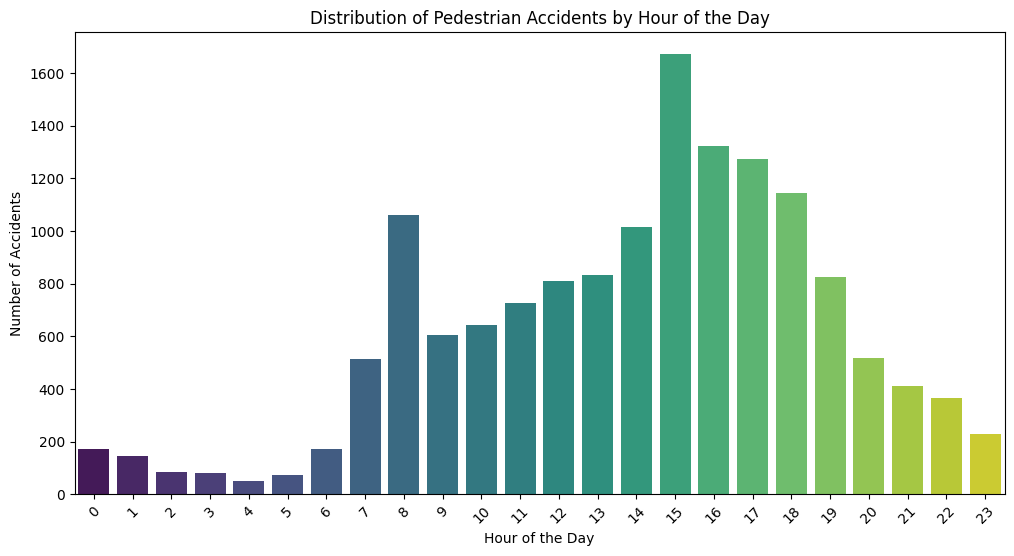

In [1478]:
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=pedestrian_accident_merged, palette='viridis')
plt.title('Distribution of Pedestrian Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

C:\Users\boluw\AppData\Local\Temp\ipykernel_7116\3758752755.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day_of_week', data=pedestrian_accident_merged, palette='viridis')


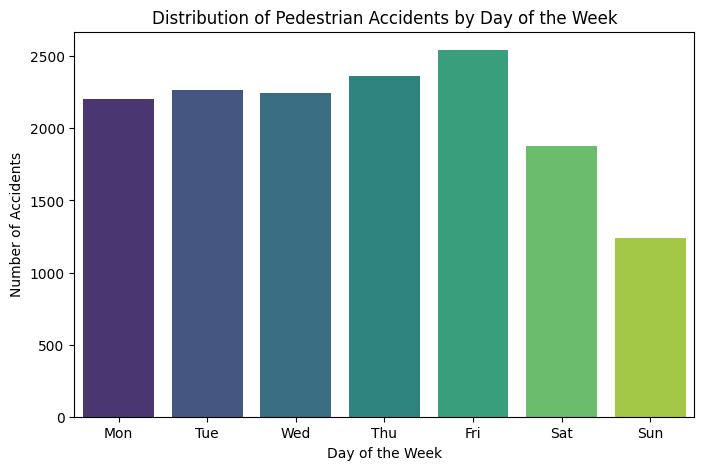

In [1479]:
plt.figure(figsize=(8, 5))
sns.countplot(x='day_of_week', data=pedestrian_accident_merged, palette='viridis')
plt.title('Distribution of Pedestrian Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

In [1480]:
# Merging accident and casualty DataFrames
merged_df = pd.merge(accident_df, casualty_df, on='accident_index', suffixes=('_accident', '_casualty'))

In [1481]:
# Merging the result with vehicle DataFrame
merged_df = pd.merge(merged_df, vehicle_df, on=['accident_index', 'vehicle_reference'], suffixes=('', '_vehicle'))

In [1482]:
# Selecting only the relevant columns
selected_columns = [
    'accident_index', 'accident_reference', 'vehicle_reference', 'casualty_reference', 'casualty_severity', 'day',
    'month', 'year', 'age_of_driver', 'hour', 'day_of_week', 'road_surface_conditions',
    'vehicle_type', 'weather_conditions', 'light_conditions',
    'road_type', 'casualty_class'
]

In [1483]:
# Creating a DataFrame with the selected columns
df_apriori = merged_df[selected_columns]

In [1484]:
# Display the resulting DataFrame
df_apriori.head()

,accident_index,accident_reference,vehicle_reference,casualty_reference,casualty_severity,day,month,year,age_of_driver,hour,day_of_week,road_surface_conditions,vehicle_type,weather_conditions,light_conditions,road_type,casualty_class
0,2020010219808,010219808,1,1,3,4,2,2020,32,9,1,9,9,9,1,6,3
1,2020010220496,010220496,1,1,3,27,4,2020,45,13,0,1,9,1,1,6,3
2,2020010220496,010220496,1,2,3,27,4,2020,45,13,0,1,9,1,1,6,3
3,2020010228005,010228005,1,1,3,1,1,2020,-1,1,2,2,9,1,4,6,3
4,2020010228006,010228006,1,1,2,1,1,2020,44,1,2,1,8,1,4,6,3


In [1485]:
df_apriori['casualty_class'].value_counts()

casualty_class
1    79330
2    21504
3    14750
Name: count, dtype: int64

In [1486]:
df_apriori['casualty_severity'].value_counts()

casualty_severity
3    94022
2    20102
1     1460
Name: count, dtype: int64

In [1487]:
df_apriori['day_of_week'].value_counts()

day_of_week
4    18818
3    17508
2    16943
1    16519
5    16162
0    16036
6    13598
Name: count, dtype: int64

In [1488]:
df_apriori['road_type'].value_counts()

road_type
6    84556
3    18046
1     6558
9     2222
2     2215
7     1987
Name: count, dtype: int64

In [1489]:
df_apriori['light_conditions'].value_counts()

light_conditions
 1    80987
 4    24227
 6     6970
 7     2556
 5      843
-1        1
Name: count, dtype: int64

In [1490]:
df_apriori['light_conditions'].replace(-1, 7, inplace=True)

C:\Users\boluw\AppData\Local\Temp\ipykernel_7116\4183021472.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_apriori['light_conditions'].replace(-1, 7, inplace=True)
C:\Users\boluw\AppData\Local\Temp\ipykernel_7116\4183021472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apriori['light_conditions'].replace(-1, 7, inplace=True)


In [1491]:
df_apriori['light_conditions'].value_counts()

light_conditions
1    80987
4    24227
6     6970
7     2557
5      843
Name: count, dtype: int64

In [1492]:
df_apriori['vehicle_type'].value_counts()

vehicle_type
9     73945
1     16602
3      7278
19     4360
5      3766
11     1935
8      1875
4      1645
2      1070
90      840
21      593
97      373
20      342
98      321
22      185
10      165
17      100
23       96
16       87
18        6
Name: count, dtype: int64

In [1493]:
df_apriori['weather_conditions'].value_counts()

weather_conditions
 1    89519
 2    14965
 8     3230
 9     2769
 5     2244
 4     1824
 7      687
 3      249
 6       96
-1        1
Name: count, dtype: int64

In [1494]:
df_apriori['weather_conditions'].replace(-1, 9, inplace=True)

C:\Users\boluw\AppData\Local\Temp\ipykernel_7116\3687291755.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_apriori['weather_conditions'].replace(-1, 9, inplace=True)
C:\Users\boluw\AppData\Local\Temp\ipykernel_7116\3687291755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apriori['weather_conditions'].replace(-1, 9, inplace=Tru

In [1495]:
df_apriori['weather_conditions'].value_counts()

weather_conditions
1    89519
2    14965
8     3230
9     2770
5     2244
4     1824
7      687
3      249
6       96
Name: count, dtype: int64

In [1496]:
df_apriori['road_surface_conditions'].value_counts()

road_surface_conditions
 1    78536
 2    34311
 4      981
 9      931
-1      370
 5      252
 3      203
Name: count, dtype: int64

In [1497]:
mode_value = df_apriori['road_surface_conditions'].mode()[0]

In [1498]:
df_apriori['road_surface_conditions'].replace(-1, mode_value, inplace=True)

C:\Users\boluw\AppData\Local\Temp\ipykernel_7116\2778698793.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_apriori['road_surface_conditions'].replace(-1, mode_value, inplace=True)
C:\Users\boluw\AppData\Local\Temp\ipykernel_7116\2778698793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apriori['road_surface_conditions'].replace

In [1499]:
df_apriori['road_surface_conditions'].value_counts()

road_surface_conditions
1    78906
2    34311
4      981
9      931
5      252
3      203
Name: count, dtype: int64

In [1500]:
mode_value = df_apriori['road_surface_conditions'].mode()[0]

In [1501]:
df_apriori['road_surface_conditions'].replace(9, mode_value, inplace=True)

C:\Users\boluw\AppData\Local\Temp\ipykernel_7116\780049939.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_apriori['road_surface_conditions'].replace(9, mode_value, inplace=True)
C:\Users\boluw\AppData\Local\Temp\ipykernel_7116\780049939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apriori['road_surface_conditions'].replace(9,

In [1502]:
df_apriori['road_surface_conditions'].value_counts()

road_surface_conditions
1    79837
2    34311
4      981
5      252
3      203
Name: count, dtype: int64

In [1503]:
df_apriori

,accident_index,accident_reference,vehicle_reference,casualty_reference,casualty_severity,day,month,year,age_of_driver,hour,day_of_week,road_surface_conditions,vehicle_type,weather_conditions,light_conditions,road_type,casualty_class
0,2020010219808,010219808,1,1,3,4,2,2020,32,9,1,1,9,9,1,6,3
1,2020010220496,010220496,1,1,3,27,4,2020,45,13,0,1,9,1,1,6,3
2,2020010220496,010220496,1,2,3,27,4,2020,45,13,0,1,9,1,1,6,3
3,2020010228005,010228005,1,1,3,1,1,2020,-1,1,2,2,9,1,4,6,3
4,2020010228006,010228006,1,1,2,1,1,2020,44,1,2,1,8,1,4,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115579,2020991027064,991027064,2,1,2,12,8,2020,11,14,2,1,1,1,1,6,1
115580,2020991029573,991029573,1,1,3,13,11,2020,39,15,4,1,9,1,1,9,3
115581,2020991030297,991030297,2,1,2,15,4,2020,38,12,2,1,5,1,1,6,1
115582,2020991030900,991030900,2,1,3,15,12,2020,76,14,1,1,1,1,1,6,1


In [1504]:
df_apriori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115584 entries, 0 to 115583
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   accident_index           115584 non-null  object
 1   accident_reference       115584 non-null  object
 2   vehicle_reference        115584 non-null  int64 
 3   casualty_reference       115584 non-null  int64 
 4   casualty_severity        115584 non-null  int64 
 5   day                      115584 non-null  int32 
 6   month                    115584 non-null  int32 
 7   year                     115584 non-null  int32 
 8   age_of_driver            115584 non-null  int64 
 9   hour                     115584 non-null  int64 
 10  day_of_week              115584 non-null  int32 
 11  road_surface_conditions  115584 non-null  int64 
 12  vehicle_type             115584 non-null  int64 
 13  weather_conditions       115584 non-null  int64 
 14  light_conditions    

In [1505]:
columns_with_minus_one = [col for col in df_apriori.columns if -1 in df_apriori[col].values]

In [1506]:
print("Columns with -1 values:", columns_with_minus_one)

Columns with -1 values: ['age_of_driver']


In [1507]:
import mlxtend

In [1508]:
from mlxtend.preprocessing import TransactionEncoder

In [1509]:
from mlxtend.frequent_patterns import apriori, association_rules

In [1510]:
# Define mappings
day_of_week_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
road_type_map = {1: 'Roundabout', 2: 'One way street', 3: 'Dual carriageway', 6: 'Single carriageway', 7: 'Slip road', 9: 'Unknown'}
casualty_class_map = {1: 'Driver/Rider', 2: 'Veh./pillion Passenger', 3: 'Pedestrian'}
casualty_severity_map = {1: 'Fatal', 2: 'Serious', 3: 'Slight'}
light_conditions_map = {
    1: 'Daylight', 4: 'Darkness: street lights present and lit',
    5: 'Darkness: street lights present but unlit', 6: 'Darkness: no street lighting',
    7: 'Darkness: street lighting unknown'
}
weather_conditions_map = {
    1: 'Fine without high winds', 2: 'Raining without high winds',
    3: 'Snowing without high winds', 4: 'Fine with high winds',
    5: 'Raining with high winds', 6: 'Snowing with high winds', 7: 'Fog or mist — if hazard', 8: 'Other', 9: 'Unknown'
}

# Handle missing values by filling them with 'Unknown'
df_apriori.fillna('Unknown', inplace=True)

# Decode the data
df_apriori['day_of_week'] = df_apriori['day_of_week'].map(day_of_week_map).astype(str)
df_apriori['road_type'] = df_apriori['road_type'].map(road_type_map).astype(str)
df_apriori['casualty_class'] = df_apriori['casualty_class'].map(casualty_class_map).astype(str)
df_apriori['casualty_severity'] = df_apriori['casualty_severity'].map(casualty_severity_map).astype(str)
df_apriori['light_conditions'] = df_apriori['light_conditions'].map(light_conditions_map).astype(str)
df_apriori['weather_conditions'] = df_apriori['weather_conditions'].map(weather_conditions_map).astype(str)

# Convert dataset into transactional format
transactions = []
for index, row in df_apriori.iterrows():
    transactions.append([
        row['road_type'],
        row['day_of_week'],
        row['casualty_class'],
        row['casualty_severity'],
        row['light_conditions'],
        row['weather_conditions']
    ])

# Convert to DataFrame for Apriori algorithm
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)

# Print and interpret the rules
(rules)

C:\Users\boluw\AppData\Local\Temp\ipykernel_7116\960791248.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apriori.fillna('Unknown', inplace=True)
C:\Users\boluw\AppData\Local\Temp\ipykernel_7116\960791248.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apriori['day_of_week'] = df_apriori['day_of_week'].map(day_of_week_map).astype(str)
C:\Users\boluw\AppData\Local\Temp\ipykernel_7116\960791248.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Darkness: street lights present and lit),(Slight),0.209605,0.813452,0.169245,0.807446,0.992617,-0.001259,0.968812,-0.009322
1,(Driver/Rider),(Daylight),0.686341,0.700677,0.490535,0.714711,1.020029,0.009632,1.049193,0.062603
2,(Daylight),(Driver/Rider),0.700677,0.686341,0.490535,0.700088,1.020029,0.009632,1.045837,0.065602
3,(Daylight),(Fine without high winds),0.700677,0.774493,0.572995,0.817773,1.055882,0.030325,1.237507,0.176814
4,(Fine without high winds),(Daylight),0.774493,0.700677,0.572995,0.739832,1.055882,0.030325,1.150500,0.234691
...,...,...,...,...,...,...,...,...,...,...
102,"(Driver/Rider, Slight, Fine without high winds)",(Single carriageway),0.434126,0.731555,0.312855,0.720654,0.985100,-0.004732,0.960980,-0.026033
103,"(Driver/Rider, Single carriageway, Daylight, F...",(Slight),0.299047,0.813452,0.239229,0.799971,0.983428,-0.004031,0.932607,-0.023476
104,"(Driver/Rider, Slight, Single carriageway, Fin...",(Daylight),0.312855,0.700677,0.239229,0.764664,1.091322,0.020019,1.271896,0.121779
105,"(Driver/Rider, Slight, Daylight, Fine without ...",(Single carriageway),0.327364,0.731555,0.239229,0.730773,0.998932,-0.000256,0.997098,-0.001587


In [1511]:
accident_df['police_force'].value_counts()

police_force
1     20906
20     3933
99     3836
46     3405
47     3107
44     3016
43     2767
13     2764
50     2616
42     2536
6      2399
4      2354
45     2334
52     2044
14     2021
5      1717
16     1709
10     1690
31     1677
30     1462
22     1446
41     1398
32     1396
7      1363
36     1324
35     1246
12     1180
55     1158
33     1133
40     1084
37      995
54      961
62      958
34      886
21      879
23      855
63      771
3       755
53      695
60      658
11      601
17      570
61      487
48      107
Name: count, dtype: int64

Humberside regions include; 'Kingston upon Hull', 'East Riding of Yorkshire', 'North Lincolnshire' and 'North East Lincolnshire' and the police force number for Humberside region is 16 accident_df would be filtered based on 'police_force' column.

In [1512]:
# Filter dataframe for humberside region
Humberside_df = accident_df[(accident_df['police_force']==16)]
Humberside_df

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,day,month,year,hour
37750,2020160914781,2020,160914781,510156.0,429221.0,-0.331047,53.747751,16,2,1,1,2020-01-01,2,02:34:00,228,E06000010,E06000010,6,0,6,30,3,4,3,165,0,0,4,1,1,0,0,1,1,2,E01033109,1,1,2020,2
37751,2020160914930,2020,160914930,506050.0,428813.0,-0.393424,53.744936,16,3,2,1,2020-01-02,3,11:20:00,228,E06000010,E06000010,6,0,6,30,6,2,6,0,0,5,1,1,1,0,0,1,1,2,E01012777,2,1,2020,11
37752,2020160915008,2020,160915008,497660.0,402806.0,-0.528743,53.512895,16,3,1,1,2020-01-02,3,16:17:00,232,E06000013,E06000013,4,1206,6,30,5,4,4,1207,0,0,4,1,1,0,0,2,1,2,E01013325,2,1,2020,16
37753,2020160915028,2020,160915028,510449.0,434112.0,-0.324858,53.791630,16,2,1,1,2020-01-02,3,17:30:00,228,E06000010,E06000010,6,0,6,30,0,-1,0,-1,0,0,4,1,1,0,0,1,1,2,E01012788,2,1,2020,17
37754,2020160915041,2020,160915041,526236.0,410340.0,-0.095008,53.574501,16,3,1,1,2020-01-02,3,22:50:00,233,E06000012,E06000012,3,180,3,50,0,-1,0,-1,0,0,4,1,1,0,0,1,1,2,E01013220,2,1,2020,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39454,2020161014491,2020,161014491,489433.0,408637.0,-0.651104,53.566753,16,3,2,1,2020-12-25,4,15:18:00,232,E06000013,E06000013,4,1450,6,30,3,4,6,0,0,0,1,1,1,0,0,1,2,2,E01013239,25,12,2020,15
39455,2020161014528,2020,161014528,503756.0,439285.0,-0.424674,53.839482,16,3,2,1,2020-12-31,3,16:50:00,231,E06000011,E06000011,6,0,6,30,0,-1,0,-1,0,0,4,1,1,0,0,1,2,2,E01013041,31,12,2020,16
39456,2020161014544,2020,161014544,511525.0,433149.0,-0.308880,53.782750,16,3,1,1,2020-12-24,3,09:12:00,228,E06000010,E06000010,6,0,6,30,0,-1,0,-1,0,0,1,1,1,0,0,1,2,2,E01012907,24,12,2020,9
39457,2020161014546,2020,161014546,485978.0,408912.0,-0.703181,53.569801,16,3,2,2,2020-12-08,1,12:41:00,232,E06000013,E06000013,1,181,3,70,0,-1,0,-1,0,0,1,1,1,0,1,2,2,1,E01013286,8,12,2020,12


In [1513]:
# Select relevant columns for clustering
Humberside_df_clustering = Humberside_df[['latitude', 'longitude']]

# Handle missing values by removing rows with missing latitude or longitude
Humberside_df_clustering = Humberside_df_clustering.dropna()

# Display the cleaned dataframe
(Humberside_df_clustering.head())

,latitude,longitude
37750,53.747751,-0.331047
37751,53.744936,-0.393424
37752,53.512895,-0.528743
37753,53.791630,-0.324858
37754,53.574501,-0.095008


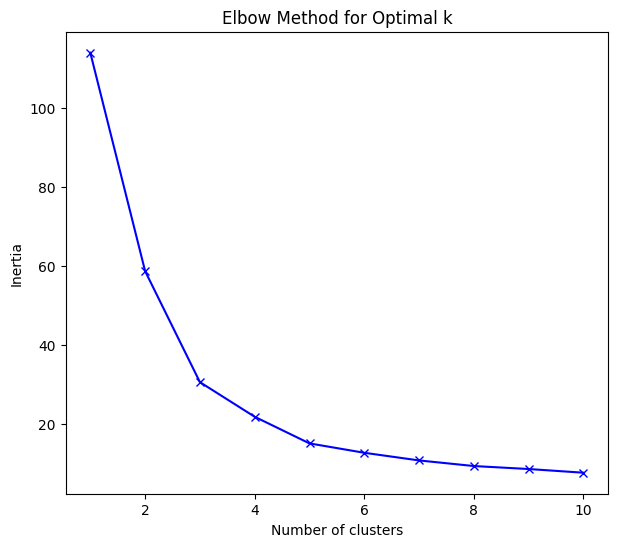

,latitude,longitude,cluster
37750,53.747751,-0.331047,1
37751,53.744936,-0.393424,1
37752,53.512895,-0.528743,0
37753,53.791630,-0.324858,1
37754,53.574501,-0.095008,2


In [1514]:
# Determine the number of clusters (k) using the elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Humberside_df_clustering)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(7, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Choose the optimal number of clusters (e.g., k=3)
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal)
Humberside_df_clustering['cluster'] = kmeans.fit_predict(Humberside_df_clustering)

# Display the clustering result
(Humberside_df_clustering.head())

C:\Users\boluw\AppData\Local\Temp\ipykernel_7116\2730937513.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Humberside_df['cluster'] = kmeans.fit_predict(features)


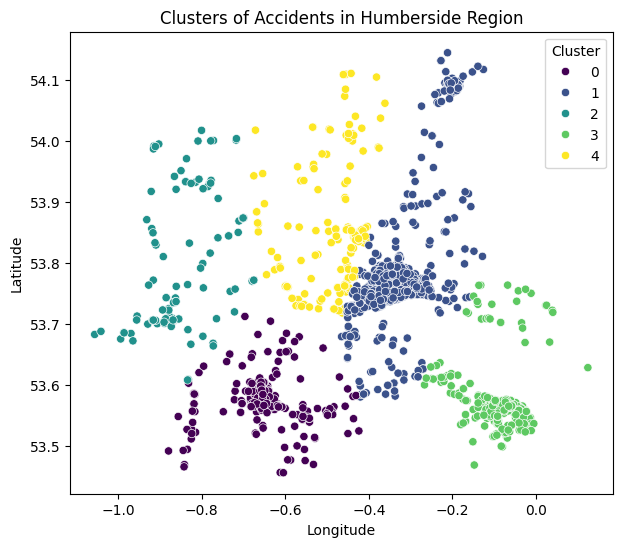

In [1515]:
# Filter the dataframe for Humberside region
Humberside_df = accident_df[accident_df['police_force'] == 16]

# Extract the latitude and longitude for clustering
features = Humberside_df[['latitude', 'longitude']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
Humberside_df['cluster'] = kmeans.fit_predict(features)

# Visualize the clusters
plt.figure(figsize=(7, 6))
sns.scatterplot(data=Humberside_df, x='longitude', y='latitude', hue='cluster', palette='viridis')
plt.title('Clusters of Accidents in Humberside Region')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()

In [1516]:
def m_iqr(data):
    """
    Calculate outliers and far outliers using the interquartile range (IQR) method.

    Parameters:
    data (array-like): 1-D array or list containing the data points.

    Returns:
    array: An array containing the values of outliers and far outliers.
    """
    # Calculate the 75th and 25th percentiles
    q75, q25 = np.percentile(data, [75, 25])
    # Calculate the interquartile range (IQR)
    iqr = q75 - q25
    # Define upper and lower bounds for outliers
    upper = q75 + 1.5 * iqr
    lower = q25 - 1.5 * iqr
    lower_far = q25 - 3 * iqr
    upper_far = q75 + 3 * iqr
    
    # Find indices and values of outliers
    outliers_lower = (data < lower) 
    outliers_upper = (data > upper)
    outlier_indices = np.where(outliers_lower | outliers_upper)[0]
    outlier_values = data[outlier_indices]
    
    # Find indices and values of far outliers
    far_outliers_lower = (data < lower_far)
    far_outliers_upper = (data > upper_far)
    far_outliers_indices = np.where(far_outliers_lower | far_outliers_upper)[0]
    far_outliers_values = data[far_outliers_indices]
    
    # Print summary of outliers and far outliers
    print(f'({np.sum(outliers_lower)} outliers < Lower Limit: {lower:.2f}), and (Upper Limit: {upper:.2f} < {np.sum(outliers_upper)} outliers)')
    print(f'\n({np.sum(far_outliers_lower)} far outliers < Far lower Limit: {lower_far:.2f}), and (Far upper Limit: {upper_far:.2f} < {np.sum(far_outliers_upper)} far outliers)')
    
    return outlier_values

In [1517]:
outlier_values = m_iqr(casualty_df["age_of_casualty"])

(0 outliers < Lower Limit: -17.50), and (Upper Limit: 90.50 < 215 outliers)

(0 far outliers < Far lower Limit: -58.00), and (Far upper Limit: 131.00 < 0 far outliers)


In [1518]:
columns_to_check = ['age_of_casualty']

# Define an empty DataFrame to store the outliers
outliers = pd.DataFrame()

# Loop through each column
for column in columns_to_check:
    # Check if the column exists in casualty_df
    if column in casualty_df.columns:
        # Calculate quartiles and IQR
        Q1 = casualty_df[column].quantile(0.25)
        Q3 = casualty_df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        column_outliers = casualty_df[(casualty_df[column] < lower_bound) | (casualty_df[column] > upper_bound)]

        # Append outliers to the DataFrame
        outliers = pd.concat([outliers, column_outliers])

        # Print number of outliers
        num_outliers = len(column_outliers)
        print(f"Number of outliers in '{column}': {num_outliers}")
    else:
        print(f"Column '{column}' not found in casualty_df.")

# Print the outliers
print("Outliers:")
(outliers)

Number of outliers in 'age_of_casualty': 215
Outliers:


,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
492,485240,2020010229497,2020,010229497,1,1,3,2,91,11,2,4,1,0,0,0,0,1,3
657,485405,2020010229955,2020,010229955,1,1,3,1,92,11,2,5,3,0,0,0,0,1,8
1136,485884,2020010231303,2020,010231303,1,1,2,1,94,11,3,0,0,0,3,0,11,1,10
3105,487853,2020010236342,2020,010236342,1,1,2,1,93,11,2,0,0,0,3,0,11,1,6
3950,488698,2020010238470,2020,010238470,2,1,1,1,94,11,2,0,0,0,0,0,22,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113130,597878,2020990967610,2020,990967610,1,1,2,2,91,11,3,0,0,0,3,0,11,1,10
113468,598216,2020990972908,2020,990972908,1,1,1,1,96,11,2,0,0,0,0,0,9,3,7
113469,598217,2020990972908,2020,990972908,1,2,2,2,94,11,3,0,0,1,0,0,9,3,7
115160,599908,2020991004453,2020,991004453,1,1,3,2,91,11,2,4,1,0,0,0,0,-1,-1


In [1519]:
casualty_df[casualty_df['age_of_casualty']<=0]['age_of_casualty'].unique()

array([-1,  0])

In [1520]:
casualty_df[casualty_df['age_of_casualty']== -1]

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
12,484760,2020010228022,2020,010228022,1,1,1,1,-1,-1,3,0,0,0,0,0,9,-1,-1
18,484766,2020010228031,2020,010228031,1,2,2,-1,-1,-1,3,0,0,1,0,0,9,1,1
47,484795,2020010228155,2020,010228155,1,1,2,-1,-1,-1,3,0,0,9,0,0,9,-1,-1
48,484796,2020010228155,2020,010228155,1,2,2,-1,-1,-1,3,0,0,1,0,0,9,-1,-1
61,484809,2020010228211,2020,010228211,1,2,2,-1,-1,-1,3,0,0,1,0,0,9,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110097,594845,202063C000521,2020,63C000521,2,1,1,1,-1,-1,3,0,0,0,0,0,1,-1,-1
110248,594996,202063C071820,2020,63C071820,2,1,1,2,-1,-1,3,0,0,0,0,0,9,2,7
110429,595177,202063D041920,2020,63D041920,4,2,1,1,-1,-1,2,0,0,0,0,0,9,3,8
110462,595210,202063D052820,2020,63D052820,1,1,1,1,-1,-1,2,0,0,0,0,0,5,3,9


In [1521]:
invalid_age_indices = casualty_df[casualty_df['age_of_casualty'] == -1].index

In [1522]:
invalid_age_indices

Index([    12,     18,     47,     48,     61,     92,    134,    135,    139,
          160,
       ...
       108375, 108376, 108381, 108578, 109862, 110097, 110248, 110429, 110462,
       110538],
      dtype='int64', length=2481)

In [1523]:
casualty_df= casualty_df.drop(invalid_age_indices, axis=0)

In [1524]:
casualty_df.reset_index(drop=True, inplace=True)

In [1525]:
casualty_df

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,484748,2020010219808,2020,010219808,1,1,3,1,31,6,3,9,5,0,0,0,0,1,4
1,484749,2020010220496,2020,010220496,1,1,3,2,2,1,3,1,1,0,0,0,0,1,2
2,484750,2020010220496,2020,010220496,1,2,3,2,4,1,3,1,1,0,0,0,0,1,2
3,484751,2020010228005,2020,010228005,1,1,3,1,23,5,3,5,9,0,0,0,0,1,3
4,484752,2020010228006,2020,010228006,1,1,3,1,47,8,2,4,1,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113098,600327,2020991027064,2020,991027064,2,1,1,1,11,3,2,0,0,0,0,0,1,1,2
113099,600328,2020991029573,2020,991029573,1,1,3,2,63,9,3,10,1,0,0,0,0,1,10
113100,600329,2020991030297,2020,991030297,2,1,1,1,38,7,2,0,0,0,0,0,5,2,9
113101,600330,2020991030900,2020,991030900,2,1,1,1,76,11,3,0,0,0,0,0,1,1,9


In [1526]:
age_zero = casualty_df[casualty_df['age_of_casualty']==0]
age_zero

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
287,485048,2020010228907,2020,010228907,1,3,2,1,0,1,3,0,0,0,3,0,11,1,6
920,485707,2020010230845,2020,010230845,1,1,2,-1,0,1,3,0,0,1,0,0,9,1,10
1030,485822,2020010231138,2020,010231138,1,3,2,-1,0,1,3,0,0,2,0,0,9,-1,-1
1983,486810,2020010233748,2020,010233748,2,5,2,1,0,1,3,0,0,2,0,0,9,1,3
3112,487998,2020010236708,2020,010236708,1,3,2,2,0,1,3,0,0,2,0,0,9,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110349,597578,2020990962144,2020,990962144,2,4,2,1,0,1,3,0,0,2,0,0,9,1,2
110700,597929,2020990968821,2020,990968821,2,1,2,2,0,1,3,0,0,2,0,0,9,1,2
110921,598150,2020990972231,2020,990972231,2,3,2,2,0,1,3,0,0,2,0,0,9,1,8
111352,598581,2020990978466,2020,990978466,1,5,2,2,0,1,2,0,0,2,0,0,9,2,3


In [1527]:
age_zero['accident_reference'].value_counts()

accident_reference
1378U1156    3
010228907    1
210940105    1
400926116    1
370941189    1
            ..
052000129    1
041000549    1
040984863    1
040969463    1
990983789    1
Name: count, Length: 128, dtype: int64

In [1528]:
def wrong_young_catcher(x):
    # Count the number of casualties for a given accident reference (x)
    casualties_count = casualty_df[casualty_df['accident_reference'] == x].shape[0]
    
    # Check if there is only one casualty recorded for the accident reference
    if casualties_count == 1:
        # Return the accident reference if there is only one casualty
        return x
    else:
        # Otherwise, return None or handle the case where there are multiple casualties
        return None  


In [1529]:
below_a_year = age_zero['accident_reference'].apply(wrong_young_catcher)

In [1530]:
below_a_year

287            None
920       010230845
1030           None
1983           None
3112           None
            ...    
110349         None
110700         None
110921         None
111352         None
111614         None
Name: accident_reference, Length: 130, dtype: object

In [1531]:
below_a_year.dropna(inplace=True)

In [1532]:
below_a_year.index

Index([   920,   3354,  10712,  11048,  11223,  11544,  12963,  14939,  15776,
        16027,  16215,  16236,  16778,  19052,  20621,  21064,  21332,  22157,
        22197,  22910,  28078,  28123,  28406,  28462,  28552,  28986,  29301,
        34706,  42213,  49678,  55224,  58178,  60903,  74844,  84241,  87551,
        95145, 104243, 105119, 106743, 107575],
      dtype='int64')

In [1533]:
casualty_df.drop(below_a_year.index, axis=0, inplace=True)

In [1534]:
casualty_df

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,484748,2020010219808,2020,010219808,1,1,3,1,31,6,3,9,5,0,0,0,0,1,4
1,484749,2020010220496,2020,010220496,1,1,3,2,2,1,3,1,1,0,0,0,0,1,2
2,484750,2020010220496,2020,010220496,1,2,3,2,4,1,3,1,1,0,0,0,0,1,2
3,484751,2020010228005,2020,010228005,1,1,3,1,23,5,3,5,9,0,0,0,0,1,3
4,484752,2020010228006,2020,010228006,1,1,3,1,47,8,2,4,1,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113098,600327,2020991027064,2020,991027064,2,1,1,1,11,3,2,0,0,0,0,0,1,1,2
113099,600328,2020991029573,2020,991029573,1,1,3,2,63,9,3,10,1,0,0,0,0,1,10
113100,600329,2020991030297,2020,991030297,2,1,1,1,38,7,2,0,0,0,0,0,5,2,9
113101,600330,2020991030900,2020,991030900,2,1,1,1,76,11,3,0,0,0,0,0,1,1,9


In [1535]:
merged_dff = pd.merge(casualty_df, vehicle_df, on='accident_reference', suffixes=('_casualty', '_vehicle'))

In [1536]:
# Merge the resulting DataFrame with accident_df
final_merged_df = pd.merge(merged_dff, accident_df, on='accident_reference')

In [1537]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215723 entries, 0 to 215722
Data columns (total 85 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   casualty_index                               215723 non-null  int64         
 1   accident_index_casualty                      215723 non-null  object        
 2   accident_year_casualty                       215723 non-null  int64         
 3   accident_reference                           215723 non-null  object        
 4   vehicle_reference_casualty                   215723 non-null  int64         
 5   casualty_reference                           215723 non-null  int64         
 6   casualty_class                               215723 non-null  int64         
 7   sex_of_casualty                              215723 non-null  int64         
 8   age_of_casualty                              215723 non-null  in

In [1538]:
outlier_values = m_iqr(vehicle_df["age_of_driver"])

(0 outliers < Lower Limit: -18.50), and (Upper Limit: 89.50 < 277 outliers)

(0 far outliers < Far lower Limit: -59.00), and (Far upper Limit: 130.00 < 0 far outliers)


In [1539]:
columns_to_check = ['age_of_driver']

# Define an empty DataFrame to store the outliers
outliers = pd.DataFrame()

# Loop through each column
for column in columns_to_check:
    # Check if the column exists in casualty_df
    if column in final_merged_df.columns:
        # Calculate quartiles and IQR
        Q1 = final_merged_df[column].quantile(0.25)
        Q3 = final_merged_df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        column_outliers = final_merged_df[(final_merged_df[column] < lower_bound) | (final_merged_df[column] > upper_bound)]

        # Append outliers to the DataFrame
        outliers = pd.concat([outliers, column_outliers])

        # Print number of outliers
        num_outliers = len(column_outliers)
        print(f"Number of outliers in '{column}': {num_outliers}")
    else:
        print(f"Column '{column}' not found in final_merged_df.")

# Print the outliers
print("Outliers:")
(outliers)

Number of outliers in 'age_of_driver': 230
Outliers:


,casualty_index,accident_index_casualty,accident_year_casualty,accident_reference,vehicle_reference_casualty,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,vehicle_index,accident_index_vehicle,accident_year_vehicle,vehicle_reference_vehicle,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,accident_index,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,day,month,year,hour
2396,486113,2020010231896,2020,010231896,1,1,3,2,32,6,3,1,1,0,0,0,0,1,5,683787,2020010231896,2020,1,9,0,5,5,1,0,1,0,0,0,0,1,1,6,1,91,11,1596,1,17,FORD FOCUS,-1,-1,2020010231896,2020,532876.0,196766.0,-0.080577,51.653990,1,3,1,1,2020-01-21,1,18:58:00,32,E09000010,E09000010,5,0,6,30,3,4,6,0,0,1,4,1,1,0,0,1,1,2,E01001544,21,1,2020,18
3047,486500,2020010232979,2020,010232979,1,1,3,2,52,8,3,5,1,0,0,0,0,1,2,684362,2020010232979,2020,1,9,0,9,5,3,0,5,0,0,7,0,1,1,6,1,91,11,1591,1,7,HYUNDAI IX20,1,1,2020010232979,2020,533924.0,190702.0,-0.067755,51.599248,1,2,1,2,2020-01-27,0,16:30:00,31,E09000014,E09000014,6,0,6,20,3,4,3,1010,0,0,4,2,2,0,0,1,1,2,E01002074,27,1,2020,16
3048,486501,2020010232979,2020,010232979,1,2,3,2,72,10,2,5,1,0,0,0,0,1,2,684362,2020010232979,2020,1,9,0,9,5,3,0,5,0,0,7,0,1,1,6,1,91,11,1591,1,7,HYUNDAI IX20,1,1,2020010232979,2020,533924.0,190702.0,-0.067755,51.599248,1,2,1,2,2020-01-27,0,16:30:00,31,E09000014,E09000014,6,0,6,20,3,4,3,1010,0,0,4,2,2,0,0,1,1,2,E01002074,27,1,2020,16
3494,486767,2020010233661,2020,010233661,1,1,3,2,23,5,3,1,1,0,0,0,0,1,6,684746,2020010233661,2020,1,9,0,99,9,9,99,9,9,99,9,99,1,9,6,3,93,11,1389,1,15,VAUXHALL CORSA,6,1,2020010233661,2020,518198.0,165555.0,-0.303108,51.376753,1,3,1,1,2020-01-28,1,11:20:00,23,E09000021,E09000021,3,243,6,40,99,9,6,0,9,5,1,1,1,0,0,1,3,2,E01003002,28,1,2020,11
3991,487045,2020010234255,2020,010234255,1,1,3,1,32,6,2,6,9,0,0,0,0,1,4,685155,2020010234255,2020,1,9,0,18,5,1,9,0,0,0,1,10,1,1,6,2,91,11,1198,1,4,NISSAN MICRA,4,1,2020010234255,2020,547698.0,187641.0,0.129690,51.568304,1,2,1,1,2020-02-03,0,14:35:00,16,E09000002,E09000002,5,0,6,30,0,-1,0,-1,0,1,1,1,1,0,0,1,1,2,E01000113,3,2,2020,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210601,597503,2020990961030,2020,990961030,1,2,3,2,37,7,2,6,9,0,0,0,0,1,7,845328,2020990961030,2020,1,9,0,9,7,5,0,6,0,0,0,0,1,1,5,2,91,11,1086,1,11,KIA PICANTO,10,1,2020990961030,2020,324531.0,671274.0,-3.209410,55.928585,99,1,1,2,2020-06-30,1,14:25:00,923,S12000036,S12000036,3,702,6,20,3,4,6,0,0,0,1,1,1,0,0,1,1,-1,-1,30,6,

In [1540]:
outliers = final_merged_df[final_merged_df['age_of_driver'] > 90]
print("Outliers:")
(outliers)

Outliers:


,casualty_index,accident_index_casualty,accident_year_casualty,accident_reference,vehicle_reference_casualty,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,vehicle_index,accident_index_vehicle,accident_year_vehicle,vehicle_reference_vehicle,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,accident_index,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,day,month,year,hour
2396,486113,2020010231896,2020,010231896,1,1,3,2,32,6,3,1,1,0,0,0,0,1,5,683787,2020010231896,2020,1,9,0,5,5,1,0,1,0,0,0,0,1,1,6,1,91,11,1596,1,17,FORD FOCUS,-1,-1,2020010231896,2020,532876.0,196766.0,-0.080577,51.653990,1,3,1,1,2020-01-21,1,18:58:00,32,E09000010,E09000010,5,0,6,30,3,4,6,0,0,1,4,1,1,0,0,1,1,2,E01001544,21,1,2020,18
3047,486500,2020010232979,2020,010232979,1,1,3,2,52,8,3,5,1,0,0,0,0,1,2,684362,2020010232979,2020,1,9,0,9,5,3,0,5,0,0,7,0,1,1,6,1,91,11,1591,1,7,HYUNDAI IX20,1,1,2020010232979,2020,533924.0,190702.0,-0.067755,51.599248,1,2,1,2,2020-01-27,0,16:30:00,31,E09000014,E09000014,6,0,6,20,3,4,3,1010,0,0,4,2,2,0,0,1,1,2,E01002074,27,1,2020,16
3048,486501,2020010232979,2020,010232979,1,2,3,2,72,10,2,5,1,0,0,0,0,1,2,684362,2020010232979,2020,1,9,0,9,5,3,0,5,0,0,7,0,1,1,6,1,91,11,1591,1,7,HYUNDAI IX20,1,1,2020010232979,2020,533924.0,190702.0,-0.067755,51.599248,1,2,1,2,2020-01-27,0,16:30:00,31,E09000014,E09000014,6,0,6,20,3,4,3,1010,0,0,4,2,2,0,0,1,1,2,E01002074,27,1,2020,16
3494,486767,2020010233661,2020,010233661,1,1,3,2,23,5,3,1,1,0,0,0,0,1,6,684746,2020010233661,2020,1,9,0,99,9,9,99,9,9,99,9,99,1,9,6,3,93,11,1389,1,15,VAUXHALL CORSA,6,1,2020010233661,2020,518198.0,165555.0,-0.303108,51.376753,1,3,1,1,2020-01-28,1,11:20:00,23,E09000021,E09000021,3,243,6,40,99,9,6,0,9,5,1,1,1,0,0,1,3,2,E01003002,28,1,2020,11
3991,487045,2020010234255,2020,010234255,1,1,3,1,32,6,2,6,9,0,0,0,0,1,4,685155,2020010234255,2020,1,9,0,18,5,1,9,0,0,0,1,10,1,1,6,2,91,11,1198,1,4,NISSAN MICRA,4,1,2020010234255,2020,547698.0,187641.0,0.129690,51.568304,1,2,1,1,2020-02-03,0,14:35:00,16,E09000002,E09000002,5,0,6,30,0,-1,0,-1,0,1,1,1,1,0,0,1,1,2,E01000113,3,2,2020,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210601,597503,2020990961030,2020,990961030,1,2,3,2,37,7,2,6,9,0,0,0,0,1,7,845328,2020990961030,2020,1,9,0,9,7,5,0,6,0,0,0,0,1,1,5,2,91,11,1086,1,11,KIA PICANTO,10,1,2020990961030,2020,324531.0,671274.0,-3.209410,55.928585,99,1,1,2,2020-06-30,1,14:25:00,923,S12000036,S12000036,3,702,6,20,3,4,6,0,0,0,1,1,1,0,0,1,1,-1,-1,30,6,

In [1541]:
# Extract data for drivers aged 90 and above
older_drivers_df = final_merged_df[final_merged_df['age_of_driver'] > 90]
print(f"Number of drivers aged 90+: {len(older_drivers_df)}")

Number of drivers aged 90+: 230


In [1542]:
# Calculate accident rates for older drivers
total_accidents = len(final_merged_df)
older_driver_accidents = len(older_drivers_df)

print(f"Total accidents: {total_accidents}")
print(f"Accidents involving drivers aged 90+: {older_driver_accidents}")
print(f"Percentage of accidents involving older drivers: {older_driver_accidents / total_accidents * 100:.2f}%")

Total accidents: 215723
Accidents involving drivers aged 90+: 230
Percentage of accidents involving older drivers: 0.11%


In [1543]:
# Analyze severity of accidents involving older drivers
severity_counts = older_drivers_df['casualty_severity'].value_counts()
print("Accident severity for drivers aged 90+:")
print(severity_counts)

Accident severity for drivers aged 90+:
casualty_severity
3    167
2     58
1      5
Name: count, dtype: int64


In [1544]:
# Identify common factors in accidents involving older drivers
common_factors = older_drivers_df[['road_surface_conditions', 'weather_conditions', 'light_conditions']].mode()
print("Common factors in accidents involving drivers aged 90+:")
(common_factors)

Common factors in accidents involving drivers aged 90+:


,road_surface_conditions,weather_conditions,light_conditions
0,1,1,1


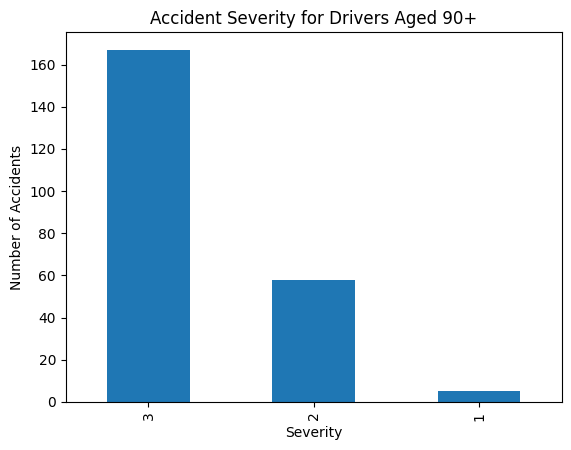

In [1545]:
# Visualize accident severity for older drivers
severity_counts.plot(kind='bar')
plt.title('Accident Severity for Drivers Aged 90+')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.show()

We'll keep the age_of_driver outlier since it has minimal effect to the severity(Fatal) of the accident and it doesn't need much attention to dwell on

In [1546]:
final_merged_df

,casualty_index,accident_index_casualty,accident_year_casualty,accident_reference,vehicle_reference_casualty,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,vehicle_index,accident_index_vehicle,accident_year_vehicle,vehicle_reference_vehicle,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,accident_index,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,day,month,year,hour
0,484748,2020010219808,2020,010219808,1,1,3,1,31,6,3,9,5,0,0,0,0,1,4,681716,2020010219808,2020,1,9,9,5,1,5,0,0,0,0,0,0,4,9,6,2,32,6,1968,2,6,AUDI Q5,4,1,2020010219808,2020,521389.0,175144.0,-0.254001,51.462262,1,3,1,1,2020-02-04,1,09:00:00,10,E09000032,E09000032,6,0,6,20,0,-1,0,-1,9,9,1,9,9,0,0,1,3,2,E01004576,4,2,2020,9
1,484749,2020010220496,2020,010220496,1,1,3,2,2,1,3,1,1,0,0,0,0,1,2,681717,2020010220496,2020,1,9,0,4,2,6,0,2,0,0,0,0,1,1,2,1,45,7,1395,1,2,AUDI A1,7,1,2020010220496,2020,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,2020-04-27,0,13:55:00,9,E09000022,E09000022,3,3036,6,20,9,2,6,0,0,4,1,1,1,0,0,1,1,2,E01003034,27,4,2020,13
2,484750,2020010220496,2020,010220496,1,2,3,2,4,1,3,1,1,0,0,0,0,1,2,681717,2020010220496,2020,1,9,0,4,2,6,0,2,0,0,0,0,1,1,2,1,45,7,1395,1,2,AUDI A1,7,1,2020010220496,2020,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,2020-04-27,0,13:55:00,9,E09000022,E09000022,3,3036,6,20,9,2,6,0,0,4,1,1,1,0,0,1,1,2,E01003034,27,4,2020,13
3,484751,2020010228005,2020,010228005,1,1,3,1,23,5,3,5,9,0,0,0,0,1,3,681718,2020010228005,2020,1,9,0,18,-1,-1,0,0,0,0,0,0,1,1,6,3,-1,-1,-1,-1,-1,-1,-1,-1,2020010228005,2020,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,2020-01-01,2,01:25:00,1,E09000033,E09000033,5,0,6,30,3,1,6,0,0,0,4,1,2,0,0,1,1,2,E01004726,1,1,2020,1
4,484752,2020010228006,2020,010228006,1,1,3,1,47,8,2,4,1,0,0,0,0,1,3,681719,2020010228006,2020,1,8,0,18,1,5,0,0,0,0,0,0,1,1,1,1,44,7,1798,8,8,TOYOTA PRIUS,2,1,2020010228006,2020,538676.0,184371.0,-0.001683,51.541210,1,2,1,1,2020-01-01,2,01:50:00,17,E09000025,E09000025,3,11,6,30,0,-1,0,-1,0,4,4,1,1,0,0,1,1,2,E01003617,1,1,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215718,600329,2020991030297,2020,991030297,2,1,1,1,38,7,2,0,0,0,0,0,5,2,9,849086,2020991030297,2020,1,9,0,7,8,2,0,6,0,0,0,0,3,1,1,1,57,9,1968,2,2,AUDI A5,7,1,2020991030297,2020,383664.0,810646.0,-2.271903,57.186317,99,2,2,1,2020-04-15,2,12:42:00,910,S12000033,S12000033,4,979,6,60,8,-1,6,0,0,0,1,1,1,0,0,2,1,-1,-1,15,4,2020,12
215719,600329,2020991030297,2020,991030297,2,1,1,1,38,7,

In [1547]:
final_merged_df[final_merged_df['age_of_driver'] == -1]

,casualty_index,accident_index_casualty,accident_year_casualty,accident_reference,vehicle_reference_casualty,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,vehicle_index,accident_index_vehicle,accident_year_vehicle,vehicle_reference_vehicle,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,accident_index,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,day,month,year,hour
3,484751,2020010228005,2020,010228005,1,1,3,1,23,5,3,5,9,0,0,0,0,1,3,681718,2020010228005,2020,1,9,0,18,-1,-1,0,0,0,0,0,0,1,1,6,3,-1,-1,-1,-1,-1,-1,-1,-1,2020010228005,2020,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,2020-01-01,2,01:25:00,1,E09000033,E09000033,5,0,6,30,3,1,6,0,0,0,4,1,2,0,0,1,1,2,E01004726,1,1,2020,1
13,484758,2020010228018,2020,010228018,1,1,1,1,62,9,3,0,0,0,0,0,9,1,6,681727,2020010228018,2020,2,9,0,2,0,0,0,2,0,0,0,0,2,1,6,3,-1,-1,1984,1,1,AUDI Q5,-1,-1,2020010228018,2020,530876.0,191335.0,-0.111500,51.605653,1,3,2,1,2020-01-01,2,04:00:00,31,E09000014,E09000014,3,105,6,20,9,4,6,0,0,0,4,1,1,0,0,1,1,2,E01002102,1,1,2020,4
29,484765,2020010228031,2020,010228031,1,1,1,1,30,6,3,0,0,0,0,0,9,1,2,681735,2020010228031,2020,2,9,9,99,9,9,99,0,9,99,9,99,9,9,6,3,-1,-1,1229,1,8,VAUXHALL CORSA,-1,-1,2020010228031,2020,553943.0,190802.0,0.221108,51.595036,1,3,2,2,2020-01-01,2,04:46:00,15,E09000016,E09000016,3,12,3,50,0,-1,0,-1,9,9,1,7,1,0,0,1,3,2,E01002293,1,1,2020,4
31,484767,2020010228032,2020,010228032,1,1,2,1,18,4,2,0,0,2,0,0,9,1,5,681737,2020010228032,2020,2,9,0,2,0,0,0,0,0,0,0,0,1,1,6,3,-1,-1,1984,1,9,VOLKSWAGEN GOLF,-1,-1,2020010228032,2020,526375.0,174240.0,-0.182588,51.453048,1,2,3,1,2020-01-01,2,01:10:00,10,E09000032,E09000032,6,0,6,20,0,-1,0,-1,0,0,4,1,2,0,0,1,1,2,E01004620,1,1,2020,1
32,484767,2020010228032,2020,010228032,1,1,2,1,18,4,2,0,0,2,0,0,9,1,5,681738,2020010228032,2020,3,9,0,2,0,0,0,0,0,0,0,0,1,1,6,3,-1,-1,2926,2,16,BMW 5 SERIES,-1,-1,2020010228032,2020,526375.0,174240.0,-0.182588,51.453048,1,2,3,1,2020-01-01,2,01:10:00,10,E09000032,E09000032,6,0,6,20,0,-1,0,-1,0,0,4,1,2,0,0,1,1,2,E01004620,1,1,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215547,600234,2020991010956,2020,991010956,1,2,1,1,19,4,3,0,0,0,0,0,9,2,1,848974,2020991010956,2020,2,19,0,2,0,0,0,0,0,0,0,0,2,1,6,3,-1,-1,-1,-1,-1,-1,-1,-1,2020991010956,2020,276445.0,651378.0,-3.969516,55.739972,99,3,2,2,2020-12-30,2,13:45:00,938,S12000029,S12000029,6,0,6,30,0,-1,0,-1,0,0,1,7,3,0,0,1,2,-1,-1,30,12,2020,13
215620,600274,20209910123

In [1548]:
final_merged_df['age_of_driver'].value_counts()

age_of_driver
-1      25141
 30      6850
 29      4915
 25      4847
 28      4846
        ...  
 97         4
 98         4
 99         3
 3          2
 100        1
Name: count, Length: 99, dtype: int64

In [1549]:
final_merged_df[final_merged_df['sex_of_driver'] == 3]

,casualty_index,accident_index_casualty,accident_year_casualty,accident_reference,vehicle_reference_casualty,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,vehicle_index,accident_index_vehicle,accident_year_vehicle,vehicle_reference_vehicle,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,accident_index,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,day,month,year,hour
3,484751,2020010228005,2020,010228005,1,1,3,1,23,5,3,5,9,0,0,0,0,1,3,681718,2020010228005,2020,1,9,0,18,-1,-1,0,0,0,0,0,0,1,1,6,3,-1,-1,-1,-1,-1,-1,-1,-1,2020010228005,2020,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,2020-01-01,2,01:25:00,1,E09000033,E09000033,5,0,6,30,3,1,6,0,0,0,4,1,2,0,0,1,1,2,E01004726,1,1,2020,1
9,484756,2020010228014,2020,010228014,1,1,1,1,41,7,3,0,0,0,0,0,9,1,3,681723,2020010228014,2020,2,9,3,18,1,5,0,1,0,0,0,0,1,1,6,3,19,4,2143,2,4,MERCEDES C CLASS,-1,-1,2020010228014,2020,539764.0,179234.0,0.011959,51.494780,1,3,2,1,2020-01-01,2,03:43:00,6,E09000011,E09000011,6,0,6,30,3,4,6,0,0,0,4,1,2,0,0,1,1,2,E01001667,1,1,2020,3
13,484758,2020010228018,2020,010228018,1,1,1,1,62,9,3,0,0,0,0,0,9,1,6,681727,2020010228018,2020,2,9,0,2,0,0,0,2,0,0,0,0,2,1,6,3,-1,-1,1984,1,1,AUDI Q5,-1,-1,2020010228018,2020,530876.0,191335.0,-0.111500,51.605653,1,3,2,1,2020-01-01,2,04:00:00,31,E09000014,E09000014,3,105,6,20,9,4,6,0,0,0,4,1,1,0,0,1,1,2,E01002102,1,1,2020,4
29,484765,2020010228031,2020,010228031,1,1,1,1,30,6,3,0,0,0,0,0,9,1,2,681735,2020010228031,2020,2,9,9,99,9,9,99,0,9,99,9,99,9,9,6,3,-1,-1,1229,1,8,VAUXHALL CORSA,-1,-1,2020010228031,2020,553943.0,190802.0,0.221108,51.595036,1,3,2,2,2020-01-01,2,04:46:00,15,E09000016,E09000016,3,12,3,50,0,-1,0,-1,9,9,1,7,1,0,0,1,3,2,E01002293,1,1,2020,4
31,484767,2020010228032,2020,010228032,1,1,2,1,18,4,2,0,0,2,0,0,9,1,5,681737,2020010228032,2020,2,9,0,2,0,0,0,0,0,0,0,0,1,1,6,3,-1,-1,1984,1,9,VOLKSWAGEN GOLF,-1,-1,2020010228032,2020,526375.0,174240.0,-0.182588,51.453048,1,2,3,1,2020-01-01,2,01:10:00,10,E09000032,E09000032,6,0,6,20,0,-1,0,-1,0,0,4,1,2,0,0,1,1,2,E01004620,1,1,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215620,600274,2020991012311,2020,991012311,1,1,1,1,35,6,2,0,0,0,0,0,3,1,5,849018,2020991012311,2020,2,19,0,2,0,0,0,1,0,0,0,0,2,1,6,3,-1,-1,2402,2,12,FORD TRANSIT,-1,-1,2020991012311,2020,311646.0,683727.0,-3.419652,56.038240,99,2,2,1,2020-12-28,0,17:55:00,925,S12000015,S12000015,6,0,6,30,7,4,6,0,0,0,4,1,1,0,0,1,1,-1,-1,28,12,2020,17
215673,600306,2020

In [1550]:
driver_df = final_merged_df[(final_merged_df['sex_of_driver'] == 3) & (final_merged_df['age_of_driver'] == -1)]

In [1551]:
driver_df

,casualty_index,accident_index_casualty,accident_year_casualty,accident_reference,vehicle_reference_casualty,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,vehicle_index,accident_index_vehicle,accident_year_vehicle,vehicle_reference_vehicle,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,accident_index,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,day,month,year,hour
3,484751,2020010228005,2020,010228005,1,1,3,1,23,5,3,5,9,0,0,0,0,1,3,681718,2020010228005,2020,1,9,0,18,-1,-1,0,0,0,0,0,0,1,1,6,3,-1,-1,-1,-1,-1,-1,-1,-1,2020010228005,2020,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,2020-01-01,2,01:25:00,1,E09000033,E09000033,5,0,6,30,3,1,6,0,0,0,4,1,2,0,0,1,1,2,E01004726,1,1,2020,1
13,484758,2020010228018,2020,010228018,1,1,1,1,62,9,3,0,0,0,0,0,9,1,6,681727,2020010228018,2020,2,9,0,2,0,0,0,2,0,0,0,0,2,1,6,3,-1,-1,1984,1,1,AUDI Q5,-1,-1,2020010228018,2020,530876.0,191335.0,-0.111500,51.605653,1,3,2,1,2020-01-01,2,04:00:00,31,E09000014,E09000014,3,105,6,20,9,4,6,0,0,0,4,1,1,0,0,1,1,2,E01002102,1,1,2020,4
29,484765,2020010228031,2020,010228031,1,1,1,1,30,6,3,0,0,0,0,0,9,1,2,681735,2020010228031,2020,2,9,9,99,9,9,99,0,9,99,9,99,9,9,6,3,-1,-1,1229,1,8,VAUXHALL CORSA,-1,-1,2020010228031,2020,553943.0,190802.0,0.221108,51.595036,1,3,2,2,2020-01-01,2,04:46:00,15,E09000016,E09000016,3,12,3,50,0,-1,0,-1,9,9,1,7,1,0,0,1,3,2,E01002293,1,1,2020,4
31,484767,2020010228032,2020,010228032,1,1,2,1,18,4,2,0,0,2,0,0,9,1,5,681737,2020010228032,2020,2,9,0,2,0,0,0,0,0,0,0,0,1,1,6,3,-1,-1,1984,1,9,VOLKSWAGEN GOLF,-1,-1,2020010228032,2020,526375.0,174240.0,-0.182588,51.453048,1,2,3,1,2020-01-01,2,01:10:00,10,E09000032,E09000032,6,0,6,20,0,-1,0,-1,0,0,4,1,2,0,0,1,1,2,E01004620,1,1,2020,1
32,484767,2020010228032,2020,010228032,1,1,2,1,18,4,2,0,0,2,0,0,9,1,5,681738,2020010228032,2020,3,9,0,2,0,0,0,0,0,0,0,0,1,1,6,3,-1,-1,2926,2,16,BMW 5 SERIES,-1,-1,2020010228032,2020,526375.0,174240.0,-0.182588,51.453048,1,2,3,1,2020-01-01,2,01:10:00,10,E09000032,E09000032,6,0,6,20,0,-1,0,-1,0,0,4,1,2,0,0,1,1,2,E01004620,1,1,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215547,600234,2020991010956,2020,991010956,1,2,1,1,19,4,3,0,0,0,0,0,9,2,1,848974,2020991010956,2020,2,19,0,2,0,0,0,0,0,0,0,0,2,1,6,3,-1,-1,-1,-1,-1,-1,-1,-1,2020991010956,2020,276445.0,651378.0,-3.969516,55.739972,99,3,2,2,2020-12-30,2,13:45:00,938,S12000029,S12000029,6,0,6,30,0,-1,0,-1,0,0,1,7,3,0,0,1,2,-1,-1,30,12,2020,13
215620,600274,20209910123

In [1552]:
# Calculate median age from final_merged_df excluding -1 values
median_age = final_merged_df[final_merged_df['age_of_driver'] != -1]['age_of_driver'].median()

# Convert the median age to an integer
median_age_int = int(median_age)

In [1553]:
# Replace -1 values in driver_df with the calculated median as an integer
driver_df['age_of_driver'] = driver_df['age_of_driver'].replace(-1, median_age_int)

C:\Users\boluw\AppData\Local\Temp\ipykernel_7116\2424043328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  driver_df['age_of_driver'] = driver_df['age_of_driver'].replace(-1, median_age_int)


In [1554]:
# Update final_merged_df with the corrected ages from driver_df
final_merged_df.loc[final_merged_df['age_of_driver'] == -1, 'age_of_driver'] = driver_df['age_of_driver']

In [1555]:
driver_df

,casualty_index,accident_index_casualty,accident_year_casualty,accident_reference,vehicle_reference_casualty,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,vehicle_index,accident_index_vehicle,accident_year_vehicle,vehicle_reference_vehicle,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,accident_index,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,day,month,year,hour
3,484751,2020010228005,2020,010228005,1,1,3,1,23,5,3,5,9,0,0,0,0,1,3,681718,2020010228005,2020,1,9,0,18,-1,-1,0,0,0,0,0,0,1,1,6,3,38,-1,-1,-1,-1,-1,-1,-1,2020010228005,2020,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,2020-01-01,2,01:25:00,1,E09000033,E09000033,5,0,6,30,3,1,6,0,0,0,4,1,2,0,0,1,1,2,E01004726,1,1,2020,1
13,484758,2020010228018,2020,010228018,1,1,1,1,62,9,3,0,0,0,0,0,9,1,6,681727,2020010228018,2020,2,9,0,2,0,0,0,2,0,0,0,0,2,1,6,3,38,-1,1984,1,1,AUDI Q5,-1,-1,2020010228018,2020,530876.0,191335.0,-0.111500,51.605653,1,3,2,1,2020-01-01,2,04:00:00,31,E09000014,E09000014,3,105,6,20,9,4,6,0,0,0,4,1,1,0,0,1,1,2,E01002102,1,1,2020,4
29,484765,2020010228031,2020,010228031,1,1,1,1,30,6,3,0,0,0,0,0,9,1,2,681735,2020010228031,2020,2,9,9,99,9,9,99,0,9,99,9,99,9,9,6,3,38,-1,1229,1,8,VAUXHALL CORSA,-1,-1,2020010228031,2020,553943.0,190802.0,0.221108,51.595036,1,3,2,2,2020-01-01,2,04:46:00,15,E09000016,E09000016,3,12,3,50,0,-1,0,-1,9,9,1,7,1,0,0,1,3,2,E01002293,1,1,2020,4
31,484767,2020010228032,2020,010228032,1,1,2,1,18,4,2,0,0,2,0,0,9,1,5,681737,2020010228032,2020,2,9,0,2,0,0,0,0,0,0,0,0,1,1,6,3,38,-1,1984,1,9,VOLKSWAGEN GOLF,-1,-1,2020010228032,2020,526375.0,174240.0,-0.182588,51.453048,1,2,3,1,2020-01-01,2,01:10:00,10,E09000032,E09000032,6,0,6,20,0,-1,0,-1,0,0,4,1,2,0,0,1,1,2,E01004620,1,1,2020,1
32,484767,2020010228032,2020,010228032,1,1,2,1,18,4,2,0,0,2,0,0,9,1,5,681738,2020010228032,2020,3,9,0,2,0,0,0,0,0,0,0,0,1,1,6,3,38,-1,2926,2,16,BMW 5 SERIES,-1,-1,2020010228032,2020,526375.0,174240.0,-0.182588,51.453048,1,2,3,1,2020-01-01,2,01:10:00,10,E09000032,E09000032,6,0,6,20,0,-1,0,-1,0,0,4,1,2,0,0,1,1,2,E01004620,1,1,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215547,600234,2020991010956,2020,991010956,1,2,1,1,19,4,3,0,0,0,0,0,9,2,1,848974,2020991010956,2020,2,19,0,2,0,0,0,0,0,0,0,0,2,1,6,3,38,-1,-1,-1,-1,-1,-1,-1,2020991010956,2020,276445.0,651378.0,-3.969516,55.739972,99,3,2,2,2020-12-30,2,13:45:00,938,S12000029,S12000029,6,0,6,30,0,-1,0,-1,0,0,1,7,3,0,0,1,2,-1,-1,30,12,2020,13
215620,600274,20209910123

In [1556]:
final_merged_df

,casualty_index,accident_index_casualty,accident_year_casualty,accident_reference,vehicle_reference_casualty,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,vehicle_index,accident_index_vehicle,accident_year_vehicle,vehicle_reference_vehicle,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,accident_index,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,day,month,year,hour
0,484748,2020010219808,2020,010219808,1,1,3,1,31,6,3,9,5,0,0,0,0,1,4,681716,2020010219808,2020,1,9,9,5,1,5,0,0,0,0,0,0,4,9,6,2,32.0,6,1968,2,6,AUDI Q5,4,1,2020010219808,2020,521389.0,175144.0,-0.254001,51.462262,1,3,1,1,2020-02-04,1,09:00:00,10,E09000032,E09000032,6,0,6,20,0,-1,0,-1,9,9,1,9,9,0,0,1,3,2,E01004576,4,2,2020,9
1,484749,2020010220496,2020,010220496,1,1,3,2,2,1,3,1,1,0,0,0,0,1,2,681717,2020010220496,2020,1,9,0,4,2,6,0,2,0,0,0,0,1,1,2,1,45.0,7,1395,1,2,AUDI A1,7,1,2020010220496,2020,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,2020-04-27,0,13:55:00,9,E09000022,E09000022,3,3036,6,20,9,2,6,0,0,4,1,1,1,0,0,1,1,2,E01003034,27,4,2020,13
2,484750,2020010220496,2020,010220496,1,2,3,2,4,1,3,1,1,0,0,0,0,1,2,681717,2020010220496,2020,1,9,0,4,2,6,0,2,0,0,0,0,1,1,2,1,45.0,7,1395,1,2,AUDI A1,7,1,2020010220496,2020,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,2020-04-27,0,13:55:00,9,E09000022,E09000022,3,3036,6,20,9,2,6,0,0,4,1,1,1,0,0,1,1,2,E01003034,27,4,2020,13
3,484751,2020010228005,2020,010228005,1,1,3,1,23,5,3,5,9,0,0,0,0,1,3,681718,2020010228005,2020,1,9,0,18,-1,-1,0,0,0,0,0,0,1,1,6,3,38.0,-1,-1,-1,-1,-1,-1,-1,2020010228005,2020,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,2020-01-01,2,01:25:00,1,E09000033,E09000033,5,0,6,30,3,1,6,0,0,0,4,1,2,0,0,1,1,2,E01004726,1,1,2020,1
4,484752,2020010228006,2020,010228006,1,1,3,1,47,8,2,4,1,0,0,0,0,1,3,681719,2020010228006,2020,1,8,0,18,1,5,0,0,0,0,0,0,1,1,1,1,44.0,7,1798,8,8,TOYOTA PRIUS,2,1,2020010228006,2020,538676.0,184371.0,-0.001683,51.541210,1,2,1,1,2020-01-01,2,01:50:00,17,E09000025,E09000025,3,11,6,30,0,-1,0,-1,0,4,4,1,1,0,0,1,1,2,E01003617,1,1,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215718,600329,2020991030297,2020,991030297,2,1,1,1,38,7,2,0,0,0,0,0,5,2,9,849086,2020991030297,2020,1,9,0,7,8,2,0,6,0,0,0,0,3,1,1,1,57.0,9,1968,2,2,AUDI A5,7,1,2020991030297,2020,383664.0,810646.0,-2.271903,57.186317,99,2,2,1,2020-04-15,2,12:42:00,910,S12000033,S12000033,4,979,6,60,8,-1,6,0,0,0,1,1,1,0,0,2,1,-1,-1,15,4,2020,12
215719,600329,2020991030297,2020,991030297,2

In [1557]:
final_merged_df['age_of_driver'].value_counts()

age_of_driver
38.0     22338
30.0      6850
29.0      4915
25.0      4847
28.0      4846
         ...  
97.0         4
98.0         4
99.0         3
3.0          2
100.0        1
Name: count, Length: 98, dtype: int64

In [1558]:
underage_drivers_df = final_merged_df[final_merged_df['age_of_driver'] < 17]

In [1559]:
underage_drivers_df

,casualty_index,accident_index_casualty,accident_year_casualty,accident_reference,vehicle_reference_casualty,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,vehicle_index,accident_index_vehicle,accident_year_vehicle,vehicle_reference_vehicle,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,accident_index,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,day,month,year,hour
143,484834,2020010228288,2020,010228288,1,1,1,1,16,4,3,0,0,0,0,0,2,1,3,681839,2020010228288,2020,1,2,0,13,6,2,0,1,2,0,0,0,1,-1,6,1,16.0,4,49,1,10,PIAGGIO FLY,3,1,2020010228288,2020,520256.0,181051.0,-0.268292,51.515593,1,3,2,1,2020-01-02,3,21:08:00,27,E09000009,E09000009,3,4000,6,20,3,4,6,0,0,0,4,2,1,0,0,1,1,2,E01001199,2,1,2020,21
154,484841,2020010228300,2020,010228300,2,1,1,1,16,4,3,0,0,0,0,0,2,1,6,681848,2020010228300,2020,2,2,0,18,2,6,0,2,0,0,0,0,1,1,6,1,16.0,4,48,1,11,PIAGGIO VESPA,6,1,2020010228300,2020,532082.0,180189.0,-0.098278,51.505208,1,3,2,1,2020-01-02,3,17:35:00,8,E09000028,E09000028,6,0,6,20,3,4,3,3200,0,0,4,1,1,0,0,1,1,2,E01003927,2,1,2020,17
300,484918,2020010228540,2020,010228540,1,1,1,1,46,8,3,0,0,0,0,0,9,1,9,681979,2020010228540,2020,2,2,0,99,9,9,99,9,9,99,9,99,9,1,6,1,16.0,4,49,1,2,-1,3,1,2020010228540,2020,526974.0,164228.0,-0.177553,51.362934,1,3,2,1,2020-01-04,5,14:55:00,21,E09000029,E09000029,3,232,6,30,99,9,5,0,0,9,1,1,1,0,0,1,3,2,E01004103,4,1,2020,14
1175,485404,2020010229954,2020,010229954,2,1,1,1,14,3,3,0,0,0,0,0,1,1,3,682710,2020010229954,2020,2,1,0,5,7,3,0,1,0,0,0,0,1,1,6,1,14.0,3,-1,-1,-1,-1,3,1,2020010229954,2020,534669.0,176207.0,-0.062543,51.468814,1,3,2,1,2020-01-12,6,17:45:00,8,E09000028,E09000028,6,0,6,20,3,4,6,0,0,1,4,1,1,0,0,1,1,2,E01004068,12,1,2020,17
1830,485792,2020010231061,2020,010231061,2,1,1,1,11,3,3,0,0,0,0,0,1,1,3,683275,2020010231061,2020,2,1,0,7,2,4,0,1,0,0,0,0,1,-1,4,1,11.0,3,-1,-1,-1,-1,3,1,2020010231061,2020,536765.0,187545.0,-0.027989,51.570198,1,3,2,1,2020-01-17,4,15:40:00,13,E09000031,E09000031,6,0,2,20,9,4,6,0,0,0,1,1,1,0,0,1,1,2,E01004427,17,1,2020,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214765,599796,2020991002390,2020,991002390,1,1,1,1,16,4,2,0,0,0,0,0,2,2,7,848399,2020991002390,2020,1,2,0,16,5,8,0,2,0,0,0,0,1,1,6,1,16.0,4,50,1,4,-1,7,2,2020991002390,2020,320067.0,566676.0,-3.250734,54.988240,99,2,2,2,2020-11-26,3,17:38:00,917,S12000006,S12000006,6,0,6,30,3,4,6,0,0,0,4,1,1,0,0,1,1,-1,-1,26,11,2020,17
214767,599797,2020991002390,2020,991002390,2

In [1568]:
# Get the indices of the rows to be dropped
indices_to_drop = underage_drivers_df.index

# Drop these rows from the original dataframe
final_merged_df = final_merged_df.drop(indices_to_drop)

# Reset the index after dropping the rows
final_merged_df = final_merged_df.reset_index(drop=True)

In [1569]:
final_merged_df['age_of_driver'].value_counts()

age_of_driver
38.0     22338
30.0      6850
29.0      4915
25.0      4847
28.0      4846
         ...  
96.0        11
97.0         4
98.0         4
99.0         3
100.0        1
Name: count, Length: 84, dtype: int64

In [1570]:
final_merged_df

,casualty_index,accident_index_casualty,accident_year_casualty,accident_reference,vehicle_reference_casualty,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,vehicle_index,accident_index_vehicle,accident_year_vehicle,vehicle_reference_vehicle,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,accident_index,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,day,month,year,hour
0,484748,2020010219808,2020,010219808,1,1,3,1,31,6,3,9,5,0,0,0,0,1,4,681716,2020010219808,2020,1,9,9,5,1,5,0,0,0,0,0,0,4,9,6,2,32.0,6,1968,2,6,AUDI Q5,4,1,2020010219808,2020,521389.0,175144.0,-0.254001,51.462262,1,3,1,1,2020-02-04,1,09:00:00,10,E09000032,E09000032,6,0,6,20,0,-1,0,-1,9,9,1,9,9,0,0,1,3,2,E01004576,4,2,2020,9
1,484749,2020010220496,2020,010220496,1,1,3,2,2,1,3,1,1,0,0,0,0,1,2,681717,2020010220496,2020,1,9,0,4,2,6,0,2,0,0,0,0,1,1,2,1,45.0,7,1395,1,2,AUDI A1,7,1,2020010220496,2020,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,2020-04-27,0,13:55:00,9,E09000022,E09000022,3,3036,6,20,9,2,6,0,0,4,1,1,1,0,0,1,1,2,E01003034,27,4,2020,13
2,484750,2020010220496,2020,010220496,1,2,3,2,4,1,3,1,1,0,0,0,0,1,2,681717,2020010220496,2020,1,9,0,4,2,6,0,2,0,0,0,0,1,1,2,1,45.0,7,1395,1,2,AUDI A1,7,1,2020010220496,2020,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,2020-04-27,0,13:55:00,9,E09000022,E09000022,3,3036,6,20,9,2,6,0,0,4,1,1,1,0,0,1,1,2,E01003034,27,4,2020,13
3,484751,2020010228005,2020,010228005,1,1,3,1,23,5,3,5,9,0,0,0,0,1,3,681718,2020010228005,2020,1,9,0,18,-1,-1,0,0,0,0,0,0,1,1,6,3,38.0,-1,-1,-1,-1,-1,-1,-1,2020010228005,2020,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,2020-01-01,2,01:25:00,1,E09000033,E09000033,5,0,6,30,3,1,6,0,0,0,4,1,2,0,0,1,1,2,E01004726,1,1,2020,1
4,484752,2020010228006,2020,010228006,1,1,3,1,47,8,2,4,1,0,0,0,0,1,3,681719,2020010228006,2020,1,8,0,18,1,5,0,0,0,0,0,0,1,1,1,1,44.0,7,1798,8,8,TOYOTA PRIUS,2,1,2020010228006,2020,538676.0,184371.0,-0.001683,51.541210,1,2,1,1,2020-01-01,2,01:50:00,17,E09000025,E09000025,3,11,6,30,0,-1,0,-1,0,4,4,1,1,0,0,1,1,2,E01003617,1,1,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212988,600329,2020991030297,2020,991030297,2,1,1,1,38,7,2,0,0,0,0,0,5,2,9,849086,2020991030297,2020,1,9,0,7,8,2,0,6,0,0,0,0,3,1,1,1,57.0,9,1968,2,2,AUDI A5,7,1,2020991030297,2020,383664.0,810646.0,-2.271903,57.186317,99,2,2,1,2020-04-15,2,12:42:00,910,S12000033,S12000033,4,979,6,60,8,-1,6,0,0,0,1,1,1,0,0,2,1,-1,-1,15,4,2020,12
212989,600329,2020991030297,2020,991030297,2

In [1574]:
final_merged_df['engine_capacity_cc'].value_counts()

engine_capacity_cc
-1       47709
 1598    12510
 1995     7564
 1968     7448
 998      6458
         ...  
 1890        1
 6702        1
 2960        1
 3564        1
 6781        1
Name: count, Length: 982, dtype: int64

In [1593]:
final_merged_df['sex_of_casualty'].value_counts()

sex_of_casualty
 1    133271
 2     79289
-1       425
 9         8
Name: count, dtype: int64

In [1594]:
final_merged_df['sex_of_driver'].value_counts()

sex_of_driver
 1    135619
 2     55989
 3     21371
-1        14
Name: count, dtype: int64

In [1575]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [1577]:
# Handle missing values
final_merged_df.fillna(method='ffill', inplace=True)

C:\Users\boluw\AppData\Local\Temp\ipykernel_7116\1968490713.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_merged_df.fillna(method='ffill', inplace=True)
